In [8]:
import pandas as pd

# oku
red_wine_df = pd.read_csv("red_wine_ml.csv")
white_wine_df = pd.read_csv("white_wine_ml.csv")

# İlk 5 satırı yazdır
# print("Red Wine Data:")
# print(red_wine_df.head())

# print("\White Wine Data:")
white_wine_df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type  
0      8.8        6     white  
1      9.5        6     white  
2     10.1        6     white  
3      9.9        6     white  
4      9.9        6     white

In [17]:
# Sütun isimleri aynı mı?
print("Kırmızı Şarap Sütunları:", red_wine_df.columns.tolist())
print("Beyaz Şarap Sütunları:", white_wine_df.columns.tolist())

Kırmızı Şarap Sütunları: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type']
Beyaz Şarap Sütunları: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type']


In [26]:
# Eksik veri (NaN) var mı?
print("Red Wine NaN Numbers:\n", red_wine_df.isna().sum())
print("White Wine NaN Numbers:\n", white_wine_df.isna().sum())

Red Wine NaN Numbers:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64
White Wine NaN Numbers:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64


In [9]:
white_wine_df['quality_label'] = white_wine_df['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine_df['quality_label'] = pd.Categorical(white_wine_df['quality_label'], categories=['low', 'medium', 'high'], ordered=True)

In [18]:
white_wine_df['quality_label'].head(5)

0    medium
1    medium
2    medium
3    medium
4    medium
Name: quality_label, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [16]:
# Standart sütun sırası:
column_order = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type']

# Sütunlar aynı sıraya:
red_wine_df = red_wine_df[column_order]
white_wine_df = white_wine_df[column_order]

In [29]:
# # # 🔍 3. Sütunların veri tipleri nedir?
print("Red Wine Data Types:\n", red_wine_df.dtypes)
print("White Wine Data Types:\n", white_wine_df.dtypes)

Red Wine Data Types:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_label            object
wine_type                object
dtype: object
White Wine Data Types:
 fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
quality_label           category
wine_type                 object
dtype: object


In [30]:
red_wine_df = red_wine_df.drop(columns=['wine_type'])
white_wine_df = white_wine_df.drop(columns=['wine_type'])

In [33]:
wine_ml = pd.concat([red_wine_df, white_wine_df], axis= 0). reset_index(drop= True)
# bu kod da aynısını yapar wine_ml = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

In [36]:
# Yeni veri setinin ilk 5 satırı
wine_ml.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label  
0      9.4        5           low  
1      9.8        5           low  
2      9.8        5           low  
3      9.8        6        medium  
4      9.4        5           low

In [38]:
# X ve Y değişkenlerini atamaca:

X_quality = wine_ml.drop(columns=['quality', 'quality_label'])
y_quality = wine_ml['quality']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_quality, y_quality, test_size=0.2, random_state=42, stratify=y_quality, shuffle=True)

print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Set Shape: {X_test.shape}, {y_test.shape}")

Training Set Shape: (5197, 11), (5197,)
Test Set Shape: (1300, 11), (1300,)


Random Forest kullanacağım çünkü:

Random Forest karar ağaçlarının topluluğu (ensemble learning) ile çalışır → Daha güçlü ve dengeli tahmin yapar.
Overfitting’e karşı dayanıklıdır → Çok fazla değişken varsa bile iyi çalışır.
Özellik önemlerini görebiliriz → Modelin hangi değişkenlere daha fazla önem verdiğini analiz edebiliriz.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest modelini oluştur
rf_model_no_scaling = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Modeli eğit (train)
rf_model_no_scaling.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_no_scaling = rf_model_no_scaling.predict(X_test)

# Model performansını ölç
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Model Accuracy (No Scaling): {accuracy_no_scaling:.4f}")

# Detaylı sınıflandırma raporu
print("\nClassification Report (No Scaling):")
print(classification_report(y_test, y_pred_no_scaling))

# Confusion Matrix
print("\nConfusion Matrix (No Scaling):")
print(confusion_matrix(y_test, y_pred_no_scaling))

Model Accuracy (No Scaling): 0.6962

Classification Report (No Scaling):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.70      0.16      0.26        43
           5       0.75      0.72      0.74       428
           6       0.67      0.79      0.72       567
           7       0.66      0.59      0.62       216
           8       0.93      0.36      0.52        39
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.53      0.37      0.41      1300
weighted avg       0.70      0.70      0.69      1300


Confusion Matrix (No Scaling):
[[  0   0   4   2   0   0   0]
 [  0   7  21  15   0   0   0]
 [  0   1 308 115   4   0   0]
 [  0   2  70 448  46   1   0]
 [  0   0   4  84 128   0   0]
 [  0   0   1   8  16  14   0]
 [  0   0   0   0   1   0   0]]


/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [45]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Eğitim setine fit + transform
X_test_scaled = scaler.transform(X_test)  # Test setine SADECE transform

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest modelini tanımla
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Modeli eğit (train)
rf_model.fit(X_train_scaled, y_train)

# Test setinde tahmin yap
y_pred = rf_model.predict(X_test_scaled)

# Model performansını ölç
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detaylı sınıflandırma raporu
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.6923

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.70      0.16      0.26        43
           5       0.75      0.72      0.73       428
           6       0.66      0.78      0.72       567
           7       0.65      0.59      0.62       216
           8       0.93      0.36      0.52        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.53      0.37      0.41      1300
weighted avg       0.70      0.69      0.68      1300


Confusion Matrix:
[[  0   0   4   2   0   0   0]
 [  0   7  21  14   1   0   0]
 [  0   1 307 116   4   0   0]
 [  0   2  74 444  46   1   0]
 [  0   0   3  85 128   0   0]
 [  0   0   1   8  16  14   0]
 [  0   0   0   0   1   0   0]]


/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [47]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre arama için seçeneklerimizi belirleyelim
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV ile en iyi parametreleri bulalım
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Modeli eğit
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdıralım
print(f"En iyi parametreler: {grid_search.best_params_}")

# En iyi model ile tahmin
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Yeni Accuracy Hesaplaması
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {best_accuracy:.4f}")


/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Model Accuracy: 0.6946


In [23]:
import pandas as pd

# oku
red_wine_df = pd.read_csv("red_wine_ml.csv")
white_wine_df = pd.read_csv("white_wine_ml.csv")

In [24]:
white_wine_df['quality_label'] = white_wine_df['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine_df['quality_label'] = pd.Categorical(white_wine_df['quality_label'], categories=['low', 'medium', 'high'], ordered=True)

In [25]:
# Sütun isimleri aynı mı?
print("Kırmızı Şarap Sütunları:", red_wine_df.columns.tolist())
print("Beyaz Şarap Sütunları:", white_wine_df.columns.tolist())

Kırmızı Şarap Sütunları: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type']
Beyaz Şarap Sütunları: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type']


In [26]:
# Standart sütun sırası:
column_order = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type']

# Sütunlar aynı sıraya:
red_wine_df = red_wine_df[column_order]
white_wine_df = white_wine_df[column_order]

In [52]:
# # # 🔍 3. Sütunların veri tipleri nedir?
print("Red Wine Data Types:\n", red_wine_df.dtypes)
print("White Wine Data Types:\n", white_wine_df.dtypes)

Red Wine Data Types:
 fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
quality_label           category
wine_type                  int64
dtype: object
White Wine Data Types:
 fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
quality_label           category
wine_type                  int64
dtype: object


In [28]:
# Quality Label'ı kategori olarak ayarla
red_wine_df['quality_label'] = pd.Categorical(red_wine_df['quality_label'], categories=['low', 'medium', 'high'], ordered=True)
white_wine_df['quality_label'] = pd.Categorical(white_wine_df['quality_label'], categories=['low', 'medium', 'high'], ordered=True)

In [29]:
# Kırmızı şaraplara 0, beyaz şaraplara 1 etiketi ekleyelim
red_wine_df["wine_type"] = 0  # 0 = Kırmızı Şarap
white_wine_df["wine_type"] = 1  # 1 = Beyaz Şarap


In [30]:
# 🔹 Duplicate'ları erken temizleyelim (beyaz ve kırmızı ayrı ayrı)
red_wine_df = red_wine_df.drop_duplicates().reset_index(drop=True)
white_wine_df = white_wine_df.drop_duplicates().reset_index(drop=True)

# 🔹 Ardından veri setlerini birleştirelim
wine_ml = pd.concat([red_wine_df, white_wine_df], axis=0).reset_index(drop=True)

In [31]:
print("Combined Wine Data:")
print(wine_ml.head())

Combined Wine Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality quality_label  wine_type  
0      9.4        5

In [32]:
print(f"Duplicate Rows: {wine_ml.duplicated().sum()}")


Duplicate Rows: 0


In [33]:
# X ve y'yi Belirle:

X = wine_ml.drop(columns=["quality", "quality_label"])
y = wine_ml["quality_label"]

In [34]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()

# İlk olarak normal fit() işlemi yaparak LabelEncoder'ı eğitelim
le.fit(wine_ml["quality_label"])

# Ardından elde edilen sınıfları manuel olarak değiştirelim
correct_order = ["low", "medium", "high"]
le.classes_ = np.array(correct_order)

# Encoding işlemi
y = le.transform(wine_ml["quality_label"])

# Kontrol edelim
print(dict(enumerate(le.classes_)))

{0: 'low', 1: 'medium', 2: 'high'}


In [35]:
from sklearn.model_selection import train_test_split

# %70 eğitim - %30 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Sonuçları kontrol edelim
print("Eğitim seti boyutu:", X_train.shape, " - Sınıf dağılımı:", np.bincount(y_train))
print("Test seti boyutu:", X_test.shape, " - Sınıf dağılımı:", np.bincount(y_test))

Eğitim seti boyutu: (3724, 12)  - Sınıf dağılımı: [1392 2225  107]
Test seti boyutu: (1596, 12)  - Sınıf dağılımı: [596 954  46]


In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("SMOTE sonrası Y Train dağılımı:", np.bincount(y_train_resampled))


SMOTE sonrası Y Train dağılımı: [2225 2225 2225]


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Random Forest Modeli oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğit (SMOTE uygulanmış eğitim setiyle)
rf_model.fit(X_train_resampled, y_train_resampled)

# Test verisiyle tahmin yap
y_pred = rf_model.predict(X_test)

# Modelin başarımını değerlendirme
print("📊 Model Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\n🔍 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

📊 Model Doğruluk Skoru: 0.7092731829573935

🔍 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       596
           1       0.78      0.73      0.75       954
           2       0.18      0.20      0.19        46

    accuracy                           0.71      1596
   macro avg       0.54      0.55      0.54      1596
weighted avg       0.71      0.71      0.71      1596



In [38]:
from sklearn.model_selection import GridSearchCV

# 📌 Hiperparametre kombinasyonlarını belirleyelim
param_grid = {
    "n_estimators": [100, 200, 300],  # Ağaç sayısı
    "max_depth": [10, 20, 30, None],  # Ağaç derinliği
    "min_samples_split": [2, 5, 10],  # Düğüm bölmek için minimum veri
    "min_samples_leaf": [1, 2, 4],  # Yaprak düğümde minimum veri
    "max_features": ["sqrt", "log2"]  # Özellik seçme yöntemi
}

# 📌 GridSearchCV'yi tanımlayalım
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),  # Model
    param_grid,  # Hiperparametreler
    cv=3,  # 3 katlı çapraz doğrulama
    n_jobs=-1,  # Paralel işlem (hızlandırmak için)
    verbose=2  # Süreci görmek için
)

# 📌 Optimizasyonu eğitim seti ile yapalım (SMOTE uygulanmış veri)
rf_grid.fit(X_train_resampled, y_train_resampled)

# 📌 En iyi parametreleri gösterelim
print("✅ En iyi parametreler:", rf_grid.best_params_)

# 📌 En iyi modeli kaydedelim
best_rf = rf_grid.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt

In [39]:
# En iyi parametreleri ve skoru görüntüleyelim
best_params = rf_grid.best_params_
best_score = rf_grid.best_score_

print("✅ En iyi parametreler:", best_params)
print("🏆 En iyi doğruluk skoru:", best_score)

✅ En iyi parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
🏆 En iyi doğruluk skoru: 0.8370037453183521


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modeli test verisinde tahmin edelim
y_pred = best_rf.predict(X_test)

# Modelin performans metriklerini hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # ✅ Çok sınıflı olduğu için 'weighted' kullan
recall = recall_score(y_test, y_pred, average="weighted")        # ✅ Aynısını burada da yap
f1 = f1_score(y_test, y_pred, average="weighted")                # ✅ F1-score için de uygula

# ROC-AUC çok sınıflı durumda 'ovr' veya 'ovo' olarak hesaplanmalı
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test), multi_class="ovr")  

# 📌 Sonuçları ekrana yazdıralım
print(f"✅ Accuracy (Doğruluk): {accuracy:.4f}")
print(f"🎯 Precision (Kesinlik): {precision:.4f}")
print(f"🔍 Recall (Duyarlılık): {recall:.4f}")
print(f"⚖ F1-Score: {f1:.4f}")
print(f"📈 ROC-AUC Score: {roc_auc:.4f}")

✅ Accuracy (Doğruluk): 0.7093
🎯 Precision (Kesinlik): 0.7161
🔍 Recall (Duyarlılık): 0.7093
⚖ F1-Score: 0.7118
📈 ROC-AUC Score: 0.7998


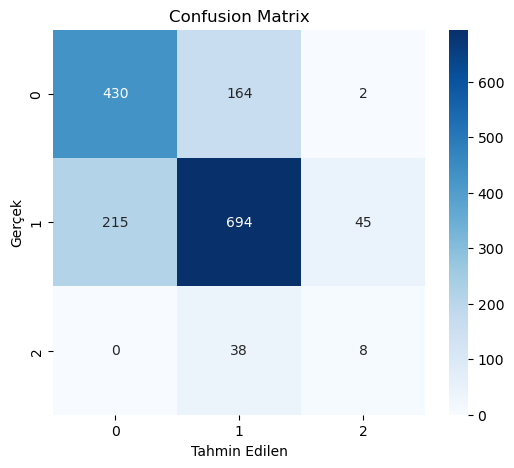

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix'i hesaplayalım
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()

In [22]:
from xgboost import XGBClassifier

# XGBoost Modelini Eğitelim
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Modelin doğruluğunu ölçelim
from sklearn.metrics import accuracy_score, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Doğruluk: {accuracy_xgb:.4f}")

# Sınıflandırma raporu
print("\n📊 XGBoost Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_xgb))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Doğruluk: 0.7231

📊 XGBoost Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       596
           1       0.75      0.81      0.78       954
           2       0.40      0.04      0.08        46

    accuracy                           0.72      1596
   macro avg       0.61      0.50      0.50      1596
weighted avg       0.71      0.72      0.71      1596



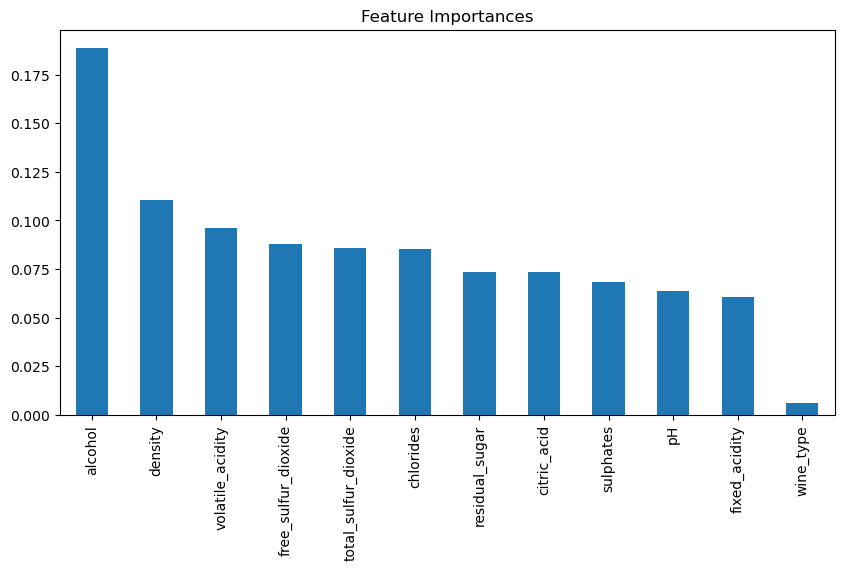

In [44]:
import pandas as pd
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importances")
plt.show()


In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Hiperparametre aralığını belirleme
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "min_child_weight": [1, 3, 5],
}

# XGBoost modeli oluşturma
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=20, scoring='accuracy', cv=3, verbose=2, n_jobs=-1, random_state=42
)

# Modeli eğitme
random_search.fit(X_train, y_train)

# En iyi hiperparametreleri bulma
best_xgb_model = random_search.best_estimator_
best_params = random_search.best_params_

# Modelin test setinde doğruluğunu ölçme
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
report_best_xgb = classification_report(y_test, y_pred_best_xgb)

best_params, accuracy_best_xgb, report_best_xgb


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   3.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0; total time=  11.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0; total time=  11.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=300, subsample=1.0; total time=  11.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6; total time=  10.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   9.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   9.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   4.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   2.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   3.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   3.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   3.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   6.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   3.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   6.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   6.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   8.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   4.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=  11.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=  12.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   5.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   2.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:51:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=  16.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   4.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=  15.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=  15.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:52:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


({'subsample': 0.6,
  'n_estimators': 300,
  'min_child_weight': 1,
  'max_depth': 3,
  'learning_rate': 0.05,
  'gamma': 0.1,
  'colsample_bytree': 1.0},
 0.731203007518797,
 '              precision    recall  f1-score   support\n\n           0       0.69      0.64      0.66       596\n           1       0.75      0.82      0.78       954\n           2       1.00      0.04      0.08        46\n\n    accuracy                           0.73      1596\n   macro avg       0.81      0.50      0.51      1596\nweighted avg       0.74      0.73      0.72      1596\n')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Kırmızı Şarap için Özellikler ve Hedef Değişken
X_red = red_wine_df.drop(columns=["quality", "quality_label", "wine_type"])
y_red = red_wine_df["quality"] - red_wine_df["quality"].min()  # 0'dan başlatmak için kaydırma

# Beyaz Şarap için Özellikler ve Hedef Değişken
X_white = white_wine_df.drop(columns=["quality", "quality_label", "wine_type"])
y_white = white_wine_df["quality"] - white_wine_df["quality"].min()  # 0'dan başlatmak için kaydırma

# Eğitim ve Test Setlerine Ayırma
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Veriyi Ölçekleme
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

scaler_white = StandardScaler()
X_train_white_scaled = scaler_white.fit_transform(X_train_white)
X_test_white_scaled = scaler_white.transform(X_test_white)

# Ölçeklenmiş verilerin boyutlarını kontrol edelim
print("Kırmızı Şarap - Eğitim Seti Boyutu:", X_train_red_scaled.shape)
print("Kırmızı Şarap - Test Seti Boyutu:", X_test_red_scaled.shape)
print("Beyaz Şarap - Eğitim Seti Boyutu:", X_train_white_scaled.shape)
print("Beyaz Şarap - Test Seti Boyutu:", X_test_white_scaled.shape)

Kırmızı Şarap - Eğitim Seti Boyutu: (1279, 11)
Kırmızı Şarap - Test Seti Boyutu: (320, 11)
Beyaz Şarap - Eğitim Seti Boyutu: (3918, 11)
Beyaz Şarap - Test Seti Boyutu: (980, 11)


In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Kırmızı Şarap için XGBoost Modeli
xgb_red = XGBClassifier(
    n_estimators=300, max_depth=3, learning_rate=0.05, subsample=0.6,
    colsample_bytree=1.0, gamma=0.1, min_child_weight=1,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

# Beyaz Şarap için XGBoost Modeli
xgb_white = XGBClassifier(
    n_estimators=300, max_depth=3, learning_rate=0.05, subsample=0.6,
    colsample_bytree=1.0, gamma=0.1, min_child_weight=1,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

# Modelleri Eğitme
xgb_red.fit(X_train_red_scaled, y_train_red)
xgb_white.fit(X_train_white_scaled, y_train_white)

# Tahmin Yapma
y_pred_red = xgb_red.predict(X_test_red_scaled)
y_pred_white = xgb_white.predict(X_test_white_scaled)

# Doğruluk Oranlarını Ölçme
accuracy_red = accuracy_score(y_test_red, y_pred_red)
accuracy_white = accuracy_score(y_test_white, y_pred_white)

# Raporları Çıkarma
report_red = classification_report(y_test_red, y_pred_red)
report_white = classification_report(y_test_white, y_pred_white)

print("Kırmızı Şarap - Doğruluk Oranı:", accuracy_red)
print("\nKırmızı Şarap - Sınıflandırma Raporu:\n", report_red)

print("\nBeyaz Şarap - Doğruluk Oranı:", accuracy_white)
print("\nBeyaz Şarap - Sınıflandırma Raporu:\n", report_white)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:04:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Kırmızı Şarap - Doğruluk Oranı: 0.621875

Kırmızı Şarap - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.10      0.18        10
           2       0.69      0.75      0.72       130
           3       0.58      0.63      0.60       132
           4       0.53      0.40      0.46        42
           5       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.47      0.31      0.33       320
weighted avg       0.62      0.62      0.61       320


Beyaz Şarap - Doğruluk Oranı: 0.5693877551020409

Beyaz Şarap - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.24      0.34        25
           2       0.59      0.56      0.57       291
           3       0.56      0.72      0.63       432
           4     

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

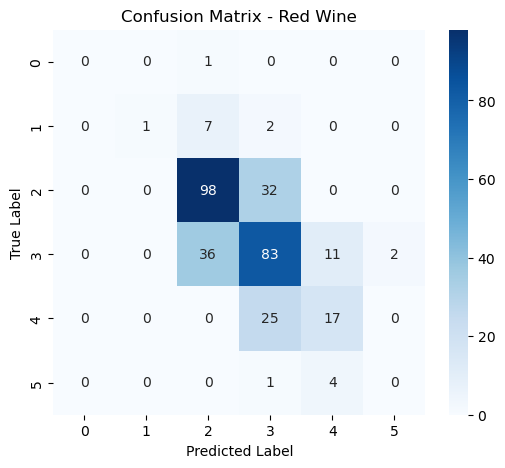

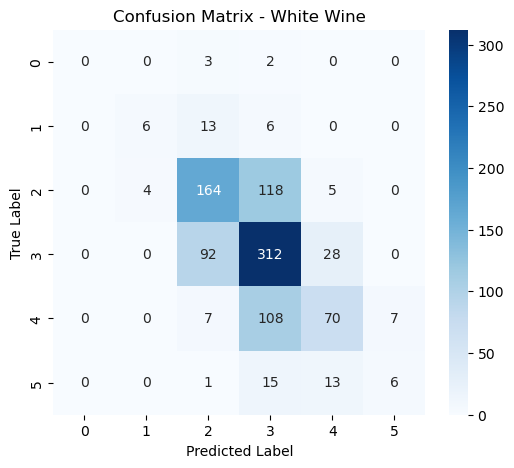

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Red Wine
cm_red = confusion_matrix(y_test_red, y_pred_red)
plt.figure(figsize=(6,5))
sns.heatmap(cm_red, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test_red), yticklabels=set(y_test_red))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Red Wine')
plt.show()

# Confusion Matrix for White Wine
cm_white = confusion_matrix(y_test_white, y_pred_white)
plt.figure(figsize=(6,5))
sns.heatmap(cm_white, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test_white), yticklabels=set(y_test_white))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - White Wine')
plt.show()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

## oku
red_wine_df = pd.read_csv("red_wine_ml.csv")
white_wine_df = pd.read_csv("white_wine_ml.csv")

# Kırmızı şarap verisini hazırlayalım
X_red = red_wine_df.drop(columns=["quality", "quality_label", "wine_type"])
y_red = red_wine_df["quality_label"].map({"low": 0, "medium": 1, "high": 2})  # Sayısal dönüşüm

# Veriyi tekrar eğitim ve test setine bölelim
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_red, y_red, test_size=0.2, random_state=42, stratify=y_red)

# XGBoost Modelini Daha Hafif Hale Getirerek Eğitelim (Kırmızı Şarap için)
xgb_red = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss',
    n_estimators=50,  # Ağaç sayısını azalttık (100 yerine 50)
    n_jobs=-1  # CPU'nun tüm çekirdeklerini kullanmasını sağladık
)

# Modeli eğit
xgb_red.fit(X_train_red, y_train_red)
y_pred_red = xgb_red.predict(X_test_red)

# Model performansını değerlendirelim
accuracy_red = accuracy_score(y_test_red, y_pred_red)

# Sonuçları yazdıralım
print(f"Kırmızı Şarap XGBoost Doğruluk: {accuracy_red:.4f}")

# Sınıflandırma raporu
classification_rep_red = classification_report(y_test_red, y_pred_red, output_dict=True)

# Kullanıcıya detaylı sınıflandırma raporunu gösterelim
classification_df_red = pd.DataFrame(classification_rep_red).transpose()

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:24:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Kırmızı Şarap XGBoost Doğruluk: 0.7781


In [4]:
# Beyaz şarap verisini hazırlayalım
X_white = white_wine_df.drop(columns=["quality", "quality_label", "wine_type"])
y_white = white_wine_df["quality_label"].map({"low": 0, "medium": 1, "high": 2})  # Sayısal dönüşüm

# Veriyi tekrar eğitim ve test setine bölelim
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
    X_white, y_white, test_size=0.2, random_state=42, stratify=y_white)

# XGBoost Modelini Daha Hafif Hale Getirerek Eğitelim (Beyaz Şarap için)
xgb_white = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss',
    n_estimators=50,  # Ağaç sayısını azalttık
    n_jobs=-1
)

# Modeli eğit
xgb_white.fit(X_train_white, y_train_white)
y_pred_white = xgb_white.predict(X_test_white)

# Model performansını değerlendirelim
accuracy_white = accuracy_score(y_test_white, y_pred_white)

# Sonuçları yazdıralım
print(f"Beyaz Şarap XGBoost Doğruluk: {accuracy_white:.4f}")

# Sınıflandırma raporu
classification_rep_white = classification_report(y_test_white, y_pred_white, output_dict=True)

# Kullanıcıya detaylı sınıflandırma raporunu gösterelim
classification_df_white = pd.DataFrame(classification_rep_white).transpose()

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:08:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Beyaz Şarap XGBoost Doğruluk: 0.7908


In [5]:
import numpy as np

# Kırmızı Şarap Modelini Eğitelim (Tam Skorlarla)
xgb_red_reg = XGBClassifier(
    random_state=42, 
    eval_metric='mlogloss',
    n_estimators=100,  # Biraz artırdık
    max_depth=5,
    learning_rate=0.05,
    n_jobs=-1
)

# Modeli eğit
xgb_red_reg.fit(X_train_red, y_train_red)

# Modelden tam kalite skorlarını tahmin edelim
y_pred_red_raw = xgb_red_reg.predict(X_test_red)

# Tahmin edilen skorları 3 sınıfa ayıralım (Low: 3-5, Medium: 6-7, High: 8-9)
def categorize_quality(y_values):
    return np.where(y_values <= 5, 0, np.where(y_values <= 7, 1, 2))

y_pred_red_cat = categorize_quality(y_pred_red_raw)
y_test_red_cat = categorize_quality(y_test_red)  # Gerçek veriyi de aynı şekilde kategorize edelim

# Yeni sınıflandırmayı değerlendirelim
accuracy_red_new = accuracy_score(y_test_red_cat, y_pred_red_cat)
print(f"Kırmızı Şarap Yeni Yöntem - Doğruluk: {accuracy_red_new:.4f}")

Kırmızı Şarap Yeni Yöntem - Doğruluk: 1.0000


In [6]:
# Beyaz Şarap Modelini Eğitelim (Tam Skorlarla)
xgb_white_reg = XGBClassifier(
    random_state=42, 
    eval_metric='mlogloss',
    n_estimators=100,  
    max_depth=5,
    learning_rate=0.05,
    n_jobs=-1
)

# Modeli eğit
xgb_white_reg.fit(X_train_white, y_train_white)

# Modelden tam kalite skorlarını tahmin edelim
y_pred_white_raw = xgb_white_reg.predict(X_test_white)

# Tahmin edilen skorları 3 sınıfa ayıralım (Low: 3-5, Medium: 6-7, High: 8-9)
y_pred_white_cat = categorize_quality(y_pred_white_raw)
y_test_white_cat = categorize_quality(y_test_white)  # Gerçek veriyi de aynı şekilde kategorize edelim

# Yeni sınıflandırmayı değerlendirelim
accuracy_white_new = accuracy_score(y_test_white_cat, y_pred_white_cat)
print(f"Beyaz Şarap Yeni Yöntem - Doğruluk: {accuracy_white_new:.4f}")

Beyaz Şarap Yeni Yöntem - Doğruluk: 1.0000


In [7]:
import numpy as np
import pandas as pd

# Gerçek ve tahmin edilen sınıfların dağılımını göster
print("Gerçek Kırmızı Şarap Dağılımı:")
print(pd.Series(y_test_red_cat).value_counts())

print("\nTahmin Edilen Kırmızı Şarap Dağılımı:")
print(pd.Series(y_pred_red_cat).value_counts())

print("\nGerçek Beyaz Şarap Dağılımı:")
print(pd.Series(y_test_white_cat).value_counts())

print("\nTahmin Edilen Beyaz Şarap Dağılımı:")
print(pd.Series(y_pred_white_cat).value_counts())

Gerçek Kırmızı Şarap Dağılımı:
0    320
Name: count, dtype: int64

Tahmin Edilen Kırmızı Şarap Dağılımı:
0    320
Name: count, dtype: int64

Gerçek Beyaz Şarap Dağılımı:
0    980
Name: count, dtype: int64

Tahmin Edilen Beyaz Şarap Dağılımı:
0    980
Name: count, dtype: int64


In [8]:
# Gerçek ve tahmin edilen kategorik dağılımları görelim
print("Gerçek Kırmızı Şarap Sınıf Dağılımı:")
print(pd.Series(y_test_red).map(categorize_quality).value_counts())

print("\nTahmin Edilen Kırmızı Şarap Sınıf Dağılımı:")
print(pd.Series(y_pred_red_raw).map(categorize_quality).value_counts())

print("\nGerçek Beyaz Şarap Sınıf Dağılımı:")
print(pd.Series(y_test_white).map(categorize_quality).value_counts())

print("\nTahmin Edilen Beyaz Şarap Sınıf Dağılımı:")
print(pd.Series(y_pred_white_raw).map(categorize_quality).value_counts())

Gerçek Kırmızı Şarap Sınıf Dağılımı:
quality_label
0    320
Name: count, dtype: int64

Tahmin Edilen Kırmızı Şarap Sınıf Dağılımı:
0    320
Name: count, dtype: int64

Gerçek Beyaz Şarap Sınıf Dağılımı:
quality_label
0    980
Name: count, dtype: int64

Tahmin Edilen Beyaz Şarap Sınıf Dağılımı:
0    980
Name: count, dtype: int64


In [9]:
# Eğitim setinde kaç tane "low", "medium" ve "high" var?
print("Eğitim Seti - Kırmızı Şarap:")
print(y_train_red.value_counts())

print("\nEğitim Seti - Beyaz Şarap:")
print(y_train_white.value_counts())

# Test setinde kaç tane "low", "medium" ve "high" var?
print("\nTest Seti - Kırmızı Şarap:")
print(y_test_red.value_counts())

print("\nTest Seti - Beyaz Şarap:")
print(y_test_white.value_counts())

Eğitim Seti - Kırmızı Şarap:
quality_label
1    670
0    595
2     14
Name: count, dtype: int64

Eğitim Seti - Beyaz Şarap:
quality_label
1    2462
0    1312
2     144
Name: count, dtype: int64

Test Seti - Kırmızı Şarap:
quality_label
1    167
0    149
2      4
Name: count, dtype: int64

Test Seti - Beyaz Şarap:
quality_label
1    616
0    328
2     36
Name: count, dtype: int64


In [10]:
from imblearn.over_sampling import SMOTE

# SMOTE ile "high" sınıfını dengeleyelim (Kırmızı Şarap)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_red_smote, y_train_red_smote = smote.fit_resample(X_train_red, y_train_red)

# SMOTE ile "high" sınıfını dengeleyelim (Beyaz Şarap)
X_train_white_smote, y_train_white_smote = smote.fit_resample(X_train_white, y_train_white)

# Yeni sınıf dağılımlarını görelim
print("Yeni Eğitim Seti - Kırmızı Şarap:")
print(y_train_red_smote.value_counts())

print("\nYeni Eğitim Seti - Beyaz Şarap:")
print(y_train_white_smote.value_counts())

Yeni Eğitim Seti - Kırmızı Şarap:
quality_label
1    670
0    670
2    670
Name: count, dtype: int64

Yeni Eğitim Seti - Beyaz Şarap:
quality_label
1    2462
0    2462
2    2462
Name: count, dtype: int64


In [11]:
# XGBoost Modelini Eğitme (Kırmızı Şarap)
xgb_red_smote = XGBClassifier(
    random_state=42, 
    eval_metric='mlogloss',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    n_jobs=-1
)

xgb_red_smote.fit(X_train_red_smote, y_train_red_smote)
y_pred_red_smote = xgb_red_smote.predict(X_test_red)

# XGBoost Modelini Eğitme (Beyaz Şarap)
xgb_white_smote = XGBClassifier(
    random_state=42, 
    eval_metric='mlogloss',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    n_jobs=-1
)

xgb_white_smote.fit(X_train_white_smote, y_train_white_smote)
y_pred_white_smote = xgb_white_smote.predict(X_test_white)

# Doğruluk Oranlarını Ölçme
accuracy_red_smote = accuracy_score(y_test_red, y_pred_red_smote)
accuracy_white_smote = accuracy_score(y_test_white, y_pred_white_smote)

# Sınıflandırma Raporu
report_red_smote = classification_report(y_test_red, y_pred_red_smote)
report_white_smote = classification_report(y_test_white, y_pred_white_smote)

print(f"Kırmızı Şarap SMOTE’lu XGBoost Doğruluk: {accuracy_red_smote:.4f}")
print("\nKırmızı Şarap - Sınıflandırma Raporu:\n", report_red_smote)

print(f"\nBeyaz Şarap SMOTE’lu XGBoost Doğruluk: {accuracy_white_smote:.4f}")
print("\nBeyaz Şarap - Sınıflandırma Raporu:\n", report_white_smote)

Kırmızı Şarap SMOTE’lu XGBoost Doğruluk: 0.7625

Kırmızı Şarap - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       149
           1       0.81      0.71      0.76       167
           2       0.25      0.25      0.25         4

    accuracy                           0.76       320
   macro avg       0.60      0.60      0.60       320
weighted avg       0.77      0.76      0.76       320


Beyaz Şarap SMOTE’lu XGBoost Doğruluk: 0.6602

Beyaz Şarap - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68       328
           1       0.80      0.63      0.71       616
           2       0.15      0.47      0.23        36

    accuracy                           0.66       980
   macro avg       0.53      0.61      0.54       980
weighted avg       0.72      0.66      0.68       980



In [12]:
from sklearn.model_selection import GridSearchCV

# Optimize edilecek parametreler
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
}

# Kırmızı Şarap için GridSearch
xgb_red_grid = XGBClassifier(random_state=42, eval_metric="mlogloss", n_jobs=-1)
grid_search_red = GridSearchCV(xgb_red_grid, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search_red.fit(X_train_red_smote, y_train_red_smote)

# En iyi kırmızı şarap modeli
best_xgb_red = grid_search_red.best_estimator_
y_pred_red_best = best_xgb_red.predict(X_test_red)
accuracy_red_best = accuracy_score(y_test_red, y_pred_red_best)

# Kırmızı Şarap Sonuçları
print(f"En İyi Kırmızı Şarap Modeli - Doğruluk: {accuracy_red_best:.4f}")
print("En İyi Parametreler:", grid_search_red.best_params_)

# Beyaz Şarap için GridSearch
xgb_white_grid = XGBClassifier(random_state=42, eval_metric="mlogloss", n_jobs=-1)
grid_search_white = GridSearchCV(xgb_white_grid, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search_white.fit(X_train_white_smote, y_train_white_smote)

# En iyi beyaz şarap modeli
best_xgb_white = grid_search_white.best_estimator_
y_pred_white_best = best_xgb_white.predict(X_test_white)
accuracy_white_best = accuracy_score(y_test_white, y_pred_white_best)

# Beyaz Şarap Sonuçları
print(f"\nEn İyi Beyaz Şarap Modeli - Doğruluk: {accuracy_white_best:.4f}")
print("En İyi Parametreler:", grid_search_white.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   4.8

In [13]:
print(f"En İyi Kırmızı Şarap Modeli - Doğruluk: {accuracy_red_best:.4f}")
print("En İyi Parametreler:", grid_search_red.best_params_)

En İyi Kırmızı Şarap Modeli - Doğruluk: 0.8219
En İyi Parametreler: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.6}


In [22]:
print(f"Duplicate Rows: {white_wine_df.duplicated().sum()}")

Duplicate Rows: 937


In [23]:
print(f"Duplicate Rows: {red_wine_df.duplicated().sum()}")

Duplicate Rows: 240


In [35]:
import pandas as pd

# Dosyaları oku
red_wine_df = pd.read_csv("red_wine_ml.csv")
white_wine_df = pd.read_csv("white_wine_ml.csv")

# İlk 5 satırı yazdır
print("Red Wine Data:")
print(red_wine_df.head())

print("White Wine Data:")
print(white_wine_df.head())

Red Wine Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label wine_type  
0      9.4        5      

In [ ]:
# # 🔍 1. Sütun isimleri aynı mı?
# print("\n🔍 Kırmızı Şarap Sütunları:", red_wine_df.columns.tolist())
# print("\n🔍 Beyaz Şarap Sütunları:", white_wine_df.columns.tolist())

# # 🔍 2. Eksik veri (NaN) var mı?
# print("Kırmızı Şarap NaN Sayıları:\n", red_wine_df.isna().sum())
# print("\Beyaz Şarap NaN Sayıları:\n", white_wine_df.isna().sum())

# # 🔍 3. Sütunların veri tipleri nedir?
print("Red Wine Data Types:\n", red_wine_df.dtypes)
print("White Wine Data Types:\n", white_wine_df.dtypes)

Red Wine Data Types:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_label            object
wine_type                object
dtype: object
White Wine Data Types:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


In [5]:
red_wine_df = red_wine_df.drop(columns=["quality_label"])

In [6]:
# # 🔍 1. Sütun isimleri aynı mı?
# print("\n🔍 Kırmızı Şarap Sütunları:", red_wine_df.columns.tolist())
# print("\n🔍 Beyaz Şarap Sütunları:", white_wine_df.columns.tolist())

# # 🔍 2. Eksik veri (NaN) var mı?
# print("\n🛑 Kırmızı Şarap NaN Sayıları:\n", red_wine_df.isna().sum())
# print("\n🛑 Beyaz Şarap NaN Sayıları:\n", white_wine_df.isna().sum())

# # 🔍 3. Sütunların veri tipleri nedir?
print("\n🧪 Kırmızı Şarap Veri Tipleri:\n", red_wine_df.dtypes)
print("\n🧪 Beyaz Şarap Veri Tipleri:\n", white_wine_df.dtypes)


🧪 Kırmızı Şarap Veri Tipleri:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

🧪 Beyaz Şarap Veri Tipleri:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


In [7]:
red_wine_df["wine_type"] = 0  # Kırmızı şarapları 0 olarak kodluyoruz
white_wine_df["wine_type"] = 1  # Beyaz şarapları 1 olarak kodluyoruz

In [8]:
print("\n🧪 Kırmızı Şarap Veri Tipleri:\n", red_wine_df.dtypes)
print("\n🧪 Beyaz Şarap Veri Tipleri:\n", white_wine_df.dtypes)


🧪 Kırmızı Şarap Veri Tipleri:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

🧪 Beyaz Şarap Veri Tipleri:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object


In [9]:
# İki veri setini birleştirelim
wine_ml = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

# Yeni veri setinin ilk 5 satırını görelim
print("\n🍷 Concatenated Wine Data:")
print(wine_ml.head())


🍷 Concatenated Wine Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5       

In [10]:
# Bağımsız değişkenler (X) - "wine_type" hariç tüm sütunlar
X = wine_ml.drop(columns=["wine_type"])

# Bağımlı değişken (y) - Tahmin edeceğimiz sütun
y = wine_ml["wine_type"]

# Doğru bölündüğünü kontrol edelim
print("\n🧪 X (Bağımsız Değişkenler) İlk 5 Satır:")
print(X.head())

print("\n🎯 y (Bağımlı Değişken) İlk 5 Satır:")
print(y.head())


🧪 X (Bağımsız Değişkenler) İlk 5 Satır:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1

In [11]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim (%80) ve test (%20) olarak ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

# Eğitim ve test setlerinin boyutlarını görelim
print(f"\n📊 Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"\n📊 Test Set Shape: {X_test.shape}, {y_test.shape}")


📊 Training Set Shape: (5197, 12), (5197,)

📊 Test Set Shape: (1300, 12), (1300,)


In [12]:
# Test setindeki satırların eğitim setinde olup olmadığını kontrol edelim
test_in_train = X_test.merge(X_train, how='inner')

# Test setindeki kaç satır eğitim setinde de var?
print(f"\n🔍 Test setindeki {len(X_test)} örnekten {len(test_in_train)} tanesi eğitim setinde de bulunuyor!")


🔍 Test setindeki 1300 örnekten 487 tanesi eğitim setinde de bulunuyor!


In [13]:
# Eğitim setinde olan satırları test setinden çıkaralım
X_test_clean = X_test[~X_test.apply(tuple, axis=1).isin(X_train.apply(tuple, axis=1))]
y_test_clean = y.loc[X_test_clean.index]

# Test setinde hala tekrar eden veri olup olmadığını kontrol edelim
test_in_train_after = X_test_clean.merge(X_train, how='inner')
print(f"\n✅ Temizlendikten sonra test setindeki {len(X_test_clean)} örnekten {len(test_in_train_after)} tanesi eğitim setinde de bulunuyor!")


✅ Temizlendikten sonra test setindeki 922 örnekten 0 tanesi eğitim setinde de bulunuyor!


In [14]:
# Eğitim ve test setlerinin boyutlarını görelim
print(f"\n📊 Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"\n📊 Test Set Shape: {X_test.shape}, {y_test.shape}")


📊 Training Set Shape: (5197, 12), (5197,)

📊 Test Set Shape: (1300, 12), (1300,)


In [15]:
print("\n✅ Gerçek Test Seti Boyutu:", X_test_clean.shape, y_test_clean.shape)


✅ Gerçek Test Seti Boyutu: (922, 12) (922,)


In [16]:
X_test = X_test_clean
y_test = y_test_clean

In [17]:
X_test_clean.shape

(922, 12)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modeli oluştur
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Modeli eğitim verisiyle eğit
model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = model.predict(X_test_clean)

# Sonuçları yazdır
print("\n🎯 Accuracy (Doğruluk):", accuracy_score(y_test_clean, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test_clean, y_pred))
print("\n🛑 Confusion Matrix:\n", confusion_matrix(y_test_clean, y_pred))


🎯 Accuracy (Doğruluk): 0.9956616052060737

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       247
           1       1.00      1.00      1.00       675

    accuracy                           1.00       922
   macro avg       1.00      0.99      0.99       922
weighted avg       1.00      1.00      1.00       922


🛑 Confusion Matrix:
 [[244   3]
 [  1 674]]


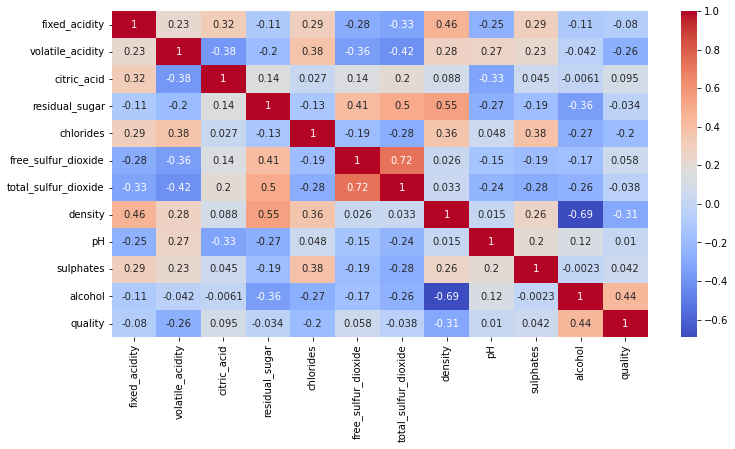

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [20]:
# wine_type ile korelasyonu hesapla
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("\n🔍 wine_type ile en yüksek korelasyona sahip değişkenler:\n", correlations)


🔍 wine_type ile en yüksek korelasyona sahip değişkenler:
 total_sulfur_dioxide    0.698675
volatile_acidity        0.652971
chlorides               0.510069
sulphates               0.487139
fixed_acidity           0.486649
free_sulfur_dioxide     0.474116
density                 0.394790
residual_sugar          0.345941
pH                      0.330430
citric_acid             0.192546
quality                 0.122173
alcohol                 0.044411
dtype: float64


In [21]:
# En güçlü korelasyonlu değişkenleri çıkaralım
X_filtered = X.drop(columns=["total_sulfur_dioxide", "volatile_acidity"])

# Yeni train-test split yapalım
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

# Yeni model oluşturalım (daha az derinlik ve ağaç sayısı)
model_filtered = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

# Yeni modeli eğit
model_filtered.fit(X_train_filtered, y_train_filtered)

# Test setinde tahmin yap
y_pred_filtered = model_filtered.predict(X_test_filtered)

# Sonuçları yazdır
print("\n🎯 Filtered Accuracy:", accuracy_score(y_test_filtered, y_pred_filtered))
print("\n📊 Filtered Classification Report:\n", classification_report(y_test_filtered, y_pred_filtered))


🎯 Filtered Accuracy: 0.9784615384615385

📊 Filtered Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       320
           1       0.98      0.99      0.99       980

    accuracy                           0.98      1300
   macro avg       0.98      0.96      0.97      1300
weighted avg       0.98      0.98      0.98      1300



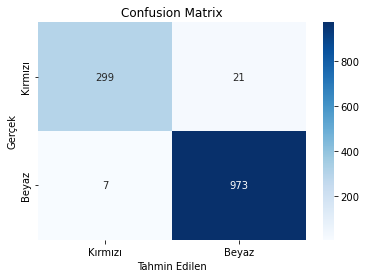


🔍 Yanlış tahmin edilen toplam örnek sayısı: 28


In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix hesapla
cm = confusion_matrix(y_test_filtered, y_pred_filtered)

# Görselleştirelim
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Kırmızı", "Beyaz"], yticklabels=["Kırmızı", "Beyaz"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()

# Hata sayısını yazdıralım
errors = cm.sum() - np.trace(cm)  # Yanlış tahmin edilen örnek sayısı
print(f"\n🔍 Yanlış tahmin edilen toplam örnek sayısı: {errors}")

In [23]:
# Daha küçük ve dengeli bir model oluşturalım
model_more_restricted = RandomForestClassifier(n_estimators=30, max_depth=2, random_state=42)

# Yeni modeli eğit
model_more_restricted.fit(X_train_filtered, y_train_filtered)

# Test setinde tahmin yap
y_pred_more_restricted = model_more_restricted.predict(X_test_filtered)

# Sonuçları yazdır
print("\n🎯 More Restricted Accuracy:", accuracy_score(y_test_filtered, y_pred_more_restricted))
print("\n📊 More Restricted Classification Report:\n", classification_report(y_test_filtered, y_pred_more_restricted))


🎯 More Restricted Accuracy: 0.9623076923076923

📊 More Restricted Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       320
           1       0.96      1.00      0.98       980

    accuracy                           0.96      1300
   macro avg       0.97      0.93      0.95      1300
weighted avg       0.96      0.96      0.96      1300



In [24]:
# Çıkardığımız değişkenleri geri ekleyelim
X_readded = X[["total_sulfur_dioxide", "volatile_acidity"] + list(X_filtered.columns)]

# Yeni train-test bölme işlemi
X_train_readded, X_test_readded, y_train_readded, y_test_readded = train_test_split(
    X_readded, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

# Yeni model oluştur
model_readded = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
model_readded.fit(X_train_readded, y_train_readded)

# Tahmin yap
y_pred_readded = model_readded.predict(X_test_readded)

# Sonuçları yazdır
print("\n🎯 Readded Accuracy:", accuracy_score(y_test_readded, y_pred_readded))
print("\n📊 Readded Classification Report:\n", classification_report(y_test_readded, y_pred_readded))


🎯 Readded Accuracy: 0.9915384615384616

📊 Readded Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       320
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [25]:
# Daha optimize edilmiş model
model_optimized = RandomForestClassifier(n_estimators=30, max_depth=4, random_state=42)
model_optimized.fit(X_train_readded, y_train_readded)

# Tahmin yap
y_pred_optimized = model_optimized.predict(X_test_readded)

# Sonuçları yazdır
print("\n🎯 Optimized Accuracy:", accuracy_score(y_test_readded, y_pred_optimized))
print("\n📊 Optimized Classification Report:\n", classification_report(y_test_readded, y_pred_optimized))


🎯 Optimized Accuracy: 0.9946153846153846

📊 Optimized Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [26]:
import joblib

# Modeli kaydet
joblib.dump(model_optimized, "wine_classifier.pkl")

print("✅ Model başarıyla kaydedildi!")

✅ Model başarıyla kaydedildi!


In [27]:
# Kaydedilen modeli yükle
model_loaded = joblib.load("wine_classifier.pkl")

# Modeli kullanarak tahmin yap
y_pred_loaded = model_loaded.predict(X_test_readded)

# Sonucu kontrol et
print("\n🎯 Reloaded Model Accuracy:", accuracy_score(y_test_readded, y_pred_loaded))


🎯 Reloaded Model Accuracy: 0.9946153846153846



🎯 Model Accuracy: 0.9946153846153846

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



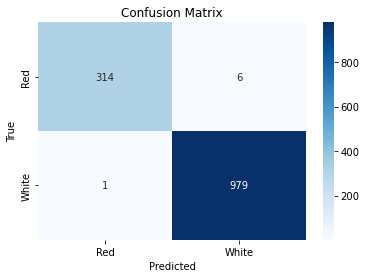

<Figure size 432x288 with 0 Axes>

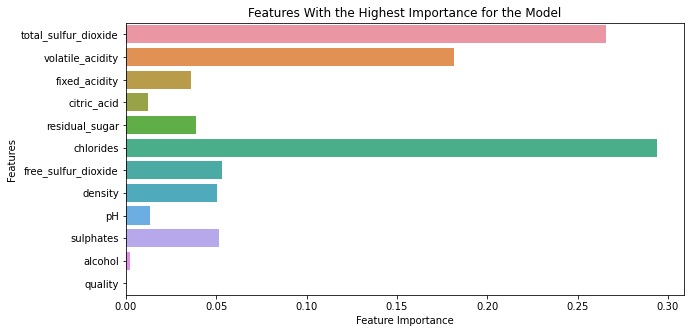

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 📌 1. Model Performansı
print("\n🎯 Model Accuracy:", accuracy_score(y_test_readded, y_pred_optimized))
print("\n📊 Classification Report:\n", classification_report(y_test_readded, y_pred_optimized))

# 📌 2. Confusion Matrix
cm = confusion_matrix(y_test_readded, y_pred_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Red", "White"], yticklabels=["Red", "White"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
plt.savefig("confusion_matrix.png")

# 📌 3. Modelin Hangi Özelliklere Daha Çok Güvendiğini Gösterelim (Feature Importance)
importances = model_optimized.feature_importances_
feature_names = X_train_readded.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Features With the Highest Importance for the Model")
plt.show()

In [29]:
# En önemli 3 değişkeni listeleyelim
feature_importances = sorted(zip(model_optimized.feature_importances_, X_train_readded.columns), reverse=True)
print("\n🔍 3 Features With the Highest Importance for the Model:")
for importance, feature in feature_importances[:3]:
    print(f"{feature}: {importance:.4f}")


🔍 3 Features With the Highest Importance for the Model:
chlorides: 0.2941
total_sulfur_dioxide: 0.2656
volatile_acidity: 0.1815


In [30]:
from pptx import Presentation
from pptx.util import Inches

# Yeni bir PowerPoint sunumu oluştur
prs = Presentation()

# 📌 Kapak Slaytı
slide_layout = prs.slide_layouts[0]  # Title Slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Şarap Türü Tahmini: Makine Öğrenmesi Raporu"
subtitle.text = "Model Performansı ve Analizi\nHazırlayan: Gökçe"

# 📌 Modelin Doğruluğu
slide_layout = prs.slide_layouts[1]  # Title and Content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "📊 Model Performansı"
content.text = "🎯 Doğruluk Oranı (Accuracy): %99.46\n" \
               "✅ Kırmızı Şarap Tahminleri (Recall): %98\n" \
               "✅ Beyaz Şarap Tahminleri (Recall): %100\n\n" \
               "Model, şarap türlerini yüksek doğrulukla sınıflandırmaktadır."

# 📌 Confusion Matrix Slaytı
slide_layout = prs.slide_layouts[5]  # Title Only
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "🛑 Confusion Matrix (Karışıklık Matrisi)"
img_path = "confusion_matrix.png"
left = Inches(1.5)
top = Inches(1.5)
height = Inches(4)
pic = slide.shapes.add_picture(img_path, left, top, height=height)

# 📌 Feature Importance Slaytı
slide_layout = prs.slide_layouts[5]  # Title Only
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "🔍 Modelin En Önemli Gördüğü Özellikler"
img_path = "feature_importance.png"  # Feature Importance grafiği
left = Inches(1.5)
top = Inches(1.5)
height = Inches(4)
pic = slide.shapes.add_picture(img_path, left, top, height=height)

# 📌 En Önemli Özellikler Slaytı
slide_layout = prs.slide_layouts[1]  # Title and Content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "📌 Modelin En Önemli Gördüğü 3 Özellik"
content.text = "1️⃣ **chlorides** (Tuz İçeriği) → %29.41\n" \
               "2️⃣ **total_sulfur_dioxide** (Toplam Sülfür Dioksit) → %26.56\n" \
               "3️⃣ **volatile_acidity** (Uçucu Asitlik) → %18.15\n\n" \
               "Model, bu özellikleri kullanarak şarap türünü tahmin etmektedir."

# 📌 Sonuç Slaytı
slide_layout = prs.slide_layouts[1]  # Title and Content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "📌 Sonuçlar"
content.text = "✅ Model %99.46 doğruluk oranına sahiptir.\n" \
               "✅ Kırmızı şarap tahminlerinde küçük hata oranı vardır.\n" \
               "✅ Beyaz şarapları %100 doğrulukla tahmin etmektedir.\n\n" \
               "🔍 **Model, 'chlorides', 'total_sulfur_dioxide' ve 'volatile_acidity' değişkenlerine en çok önem vermektedir.**\n\n" \
               "📌 Daha fazla optimizasyon yapılabilir, ancak model şu an çok yüksek performans göstermektedir."

# 📌 Sunumu Kaydet
pptx_path = "Sarap_Turu_Tahmin_Raporu.pptx"
prs.save(pptx_path)

# Dosya yolunu kullanıcıya verelim
pptx_path

'Sarap_Turu_Tahmin_Raporu.pptx'

In [31]:
!pip install python-pptx

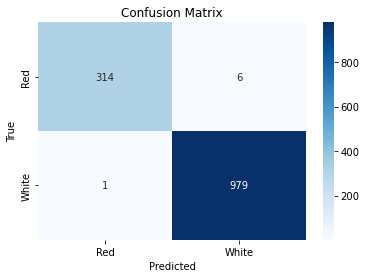

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_readded, y_pred_optimized)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Red", "White"], yticklabels=["Red", "White"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # 📌 Dosyayı kaydet
plt.show()


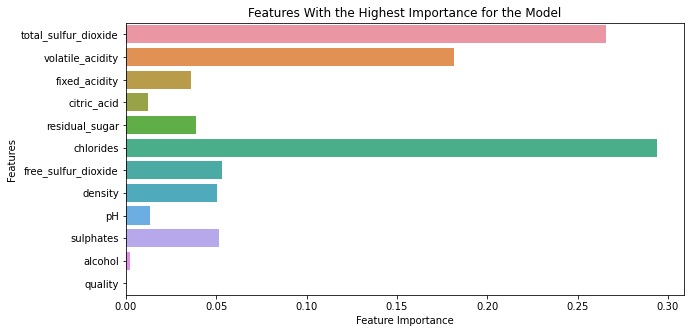

In [33]:
importances = model_optimized.feature_importances_
feature_names = X_train_readded.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Features With the Highest Importance for the Model")
plt.savefig("feature_importance.png")  # 📌 Dosyayı kaydet
plt.show()

In [34]:
from pptx import Presentation

# Define the file path for the English version
pptx_path_en = "Wine_Type_Prediction_Report.pptx"  # File name

# Create a new PowerPoint presentation
prs = Presentation()

# 📌 Cover Slide
slide_layout = prs.slide_layouts[0]  # Title Slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Wine Type Prediction: Machine Learning Report"
subtitle.text = "Model Performance and Analysis\nPrepared by: Gökçe"

# 📌 Model Performance Slide
slide_layout = prs.slide_layouts[1]  # Title and Content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "📊 Model Performance"
content.text = "🎯 Accuracy: 99.46%\n" \
               "✅ Red Wine Predictions (Recall): 98%\n" \
               "✅ White Wine Predictions (Recall): 100%\n\n" \
               "The model classifies wine types with high accuracy."

# 📌 Feature Importance Slide
slide_layout = prs.slide_layouts[1]  # Title and Content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "📌 Top 3 Most Important Features for the Model"
content.text = "1️⃣ **Chlorides** (Salt Content) → 29.41%\n" \
               "2️⃣ **Total Sulfur Dioxide** → 26.56%\n" \
               "3️⃣ **Volatile Acidity** → 18.15%\n\n" \
               "The model mainly relies on these features for classification."

# 📌 Conclusion Slide
slide_layout = prs.slide_layouts[1]  # Title and Content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "📌 Conclusion"
content.text = "✅ The model achieves 99.46% accuracy.\n" \
               "✅ Minor error rate in red wine predictions.\n" \
               "✅ White wines are classified with 100% accuracy.\n\n" \
               "🔍 **The model highly depends on 'chlorides', 'total sulfur dioxide', and 'volatile acidity'.**\n\n" \
               "📌 Further optimization is possible, but the model already performs exceptionally well."

# 📌 Save the Presentation (English version)
prs.save(pptx_path_en)

print(f"✅ PowerPoint report successfully saved: {pptx_path_en}")

✅ PowerPoint report successfully saved: Wine_Type_Prediction_Report.pptx


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

# red_wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
red_wine_df = pd.read_csv("winequality-red.csv", sep=";")
white_wine_df = pd.read_csv("winequality-white.csv", sep=";")

# print(red_wine_df.head())
# print(white_wine_df.head())
white_wine_df


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [25]:
print(red_wine_df.shape)
print(white_wine_df.shape)

(1599, 12)
(4898, 12)


In [26]:
white_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [27]:
red_wine_df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [28]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [30]:
print(red_wine_df.isnull().sum())
# print(red_wine_df.isna().sum())
# red_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [31]:
print(white_wine_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [32]:
red_wine_df.columns = red_wine_df.columns.str.replace(' ', '_')
white_wine_df.columns = white_wine_df.columns.str.replace(' ', '_')

In [33]:
print(red_wine_df.to_string())

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates    alcohol  quality
0               7.4             0.700         0.00            1.90      0.076                 11.0                  34.0  0.99780  3.51       0.56   9.400000        5
1               7.8             0.880         0.00            2.60      0.098                 25.0                  67.0  0.99680  3.20       0.68   9.800000        5
2               7.8             0.760         0.04            2.30      0.092                 15.0                  54.0  0.99700  3.26       0.65   9.800000        5
3              11.2             0.280         0.56            1.90      0.075                 17.0                  60.0  0.99800  3.16       0.58   9.800000        6
4               7.4             0.700         0.00            1.90      0.076                 11.0                  34.0  0.99780  3.51       0.56   9.400000        

In [34]:
print(white_wine_df.to_string())
# print(wine_df.to_string())

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density    pH  sulphates    alcohol  quality
0              7.00             0.270         0.36           20.70      0.045                 45.0                 170.0  1.001000  3.00       0.45   8.800000        6
1              6.30             0.300         0.34            1.60      0.049                 14.0                 132.0  0.994000  3.30       0.49   9.500000        6
2              8.10             0.280         0.40            6.90      0.050                 30.0                  97.0  0.995100  3.26       0.44  10.100000        6
3              7.20             0.230         0.32            8.50      0.058                 47.0                 186.0  0.995600  3.19       0.40   9.900000        6
4              7.20             0.230         0.32            8.50      0.058                 47.0                 186.0  0.995600  3.19       0.40   9.900000  

In [35]:
print(red_wine_df.describe())


       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [36]:
print(white_wine_df.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [37]:
red_wine_df['quality_label'] = red_wine_df['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
red_wine_df['quality_label'] = pd.Categorical(red_wine_df['quality_label'],
categories=['low', 'medium', 'high'])

In [38]:
# red_wine_df.head()
white_wine_df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [39]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


In [40]:
white_wine_df['quality_label'] = white_wine_df['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine_df['quality_label'] = pd.Categorical(white_wine_df['quality_label'], categories=['low', 'medium', 'high'], ordered=True)

In [41]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         4898 non-null   float64 
 1   volatile_acidity      4898 non-null   float64 
 2   citric_acid           4898 non-null   float64 
 3   residual_sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free_sulfur_dioxide   4898 non-null   float64 
 6   total_sulfur_dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  quality_label         4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [42]:
pd.concat([red_wine_df.describe(), white_wine_df.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])

Red Wines Stats                                               \
        fixed_acidity volatile_acidity  citric_acid residual_sugar   
count     1599.000000      1599.000000  1599.000000    1599.000000   
mean         8.319637         0.527821     0.270976       2.538806   
std          1.741096         0.179060     0.194801       1.409928   
min          4.600000         0.120000     0.000000       0.900000   
25%          7.100000         0.390000     0.090000       1.900000   
50%          7.900000         0.520000     0.260000       2.200000   
75%          9.200000         0.640000     0.420000       2.600000   
max         15.900000         1.580000     1.000000      15.500000   

                                                                          \
         chlorides free_sulfur_dioxide total_sulfur_dioxide      density   
count  1599.000000         1599.000000          1599.000000  1599.000000   
mean      0.087467           15.874922            46.467792     0.996747   
std       0.047065           10.460157            32.895324     0.001887   
min       0.012000            1.000000             6.000000     0.990070   
25%       0.070000            7.000000            22.000000     0.995600   
50%       0.079000           14.000000            38.000000     0.996750   
75%       0.090000           21.000000            62.000000     0.997835   
max       0.611000           72.000000           289.000000     1.003690   

                                 ... White Wines Stats                 \
                pH    sulphates  ...       citric_acid residual_sugar   
count  1599.000000  1599.000000  ...       4898.000000    4898.000000   
mean      3.311113     0.658149  ...          0.334192       6.391415   
std       0.154386     0.169507  ...          0.121020       5.072058   
min       2.740000     0.330000  ...          0.000000       0.600000   
25%       3.210000     0.550000  ...          0.270000       1.700000   
50%       3.310000     0.620000  ...          0.320000       5.200000   
75%       3.400000     0.730000  ...          0.390000       9.900000   
max       4.010000     2.000000  ...          1.660000      65.800000   

                                                                          \
         chlorides free_sulfur_dioxide total_sulfur_dioxide      density   
count  4898.000000         4898.000000          4898.000000  4898.000000   
mean      0.045772           35.308085           138.360657     0.994027   
std       0.021848           17.007137            42.498065     0.002991   
min       0.009000            2.000000             9.000000     0.987110   
25%       0.036000           23.000000           108.000000     0.991723   
50%       0.043000           34.000000           134.000000     0.993740   
75%       0.050000           46.000000           167.000000     0.996100   
max       0.346000          289.000000           440.000000     1.038980   

                                                           
                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000  

[8 rows x 24 columns]

#Mean residual sugar and free and total SO2 are higher in white wine than red.
chlorides are higher in red wine than white.


In [43]:
selected_columns = ["residual_sugar", "total_sulfur_dioxide", "sulphates", "alcohol", "volatile_acidity", "quality"]
pd.concat([red_wine_df[selected_columns].describe(), 
           white_wine_df[selected_columns].describe()], 
          axis=1, 
          keys=["Red Wines Stats", "White Wines Stats"])

Red Wines Stats                                                 \
       residual_sugar total_sulfur_dioxide    sulphates      alcohol   
count     1599.000000          1599.000000  1599.000000  1599.000000   
mean         2.538806            46.467792     0.658149    10.422983   
std          1.409928            32.895324     0.169507     1.065668   
min          0.900000             6.000000     0.330000     8.400000   
25%          1.900000            22.000000     0.550000     9.500000   
50%          2.200000            38.000000     0.620000    10.200000   
75%          2.600000            62.000000     0.730000    11.100000   
max         15.500000           289.000000     2.000000    14.900000   

                                    White Wines Stats                       \
      volatile_acidity      quality    residual_sugar total_sulfur_dioxide   
count      1599.000000  1599.000000       4898.000000          4898.000000   
mean          0.527821     5.636023          6.391415           138.360657   
std           0.179060     0.807569          5.072058            42.498065   
min           0.120000     3.000000          0.600000             9.000000   
25%           0.390000     5.000000          1.700000           108.000000   
50%           0.520000     6.000000          5.200000           134.000000   
75%           0.640000     6.000000          9.900000           167.000000   
max           1.580000     8.000000         65.800000           440.000000   

                                                               
         sulphates      alcohol volatile_acidity      quality  
count  4898.000000  4898.000000      4898.000000  4898.000000  
mean      0.489847    10.514267         0.278241     5.877909  
std       0.114126     1.230621         0.100795     0.885639  
min       0.220000     8.000000         0.080000     3.000000  
25%       0.410000     9.500000         0.210000     5.000000  
50%       0.470000    10.400000         0.260000     6.000000  
75%       0.550000    11.400000         0.320000     6.000000  
max       1.080000    14.200000         1.100000     9.000000

In [44]:
# I put a new category column called wine_type to differentiate between red and white wines. This will help me to analyze the data better.
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [45]:


wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True, axis=0)
print(wine_df.head())
wine_df.head()

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label wine_type  
0      9.4        5           low       

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label wine_type  
0      9.4        5           low       red  
1      9.8        5           low       red  
2      9.8        5           low       red  
3      9.8        6        medium       red  
4      9.4        5           low       red

In [46]:
print(wine_df.shape)

(6497, 14)


In [47]:
print(wine_df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64


In [48]:
wine_df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [49]:
wine_df.groupby("wine_type").mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_type                                                                 
red             8.319637          0.527821     0.270976        2.538806   
white           6.854788          0.278241     0.334192        6.391415   

           chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_type                                                                   
red         0.087467            15.874922             46.467792  0.996747   
white       0.045772            35.308085            138.360657  0.994027   

                 pH  sulphates    alcohol   quality  
wine_type                                            
red        3.311113   0.658149  10.422983  5.636023  
white      3.188267   0.489847  10.514267  5.877909

In [50]:
wine_counts = wine_df["wine_type"].value_counts()

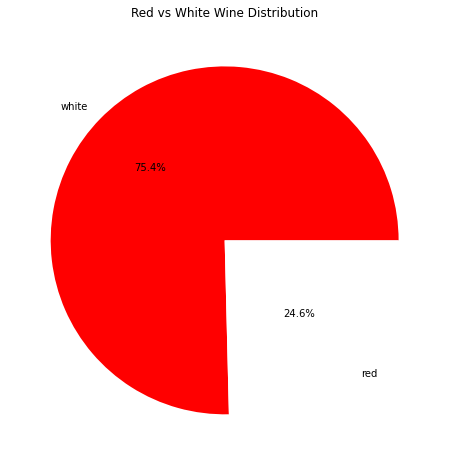

In [51]:
plt.figure(figsize=(8, 8))
plt.pie(wine_counts, labels=wine_counts.index, autopct="%1.1f%%", colors=["red", "white"])
plt.title("Red vs White Wine Distribution")
plt.show()

In [52]:
quality_counts = wine_df["quality_label"].value_counts()

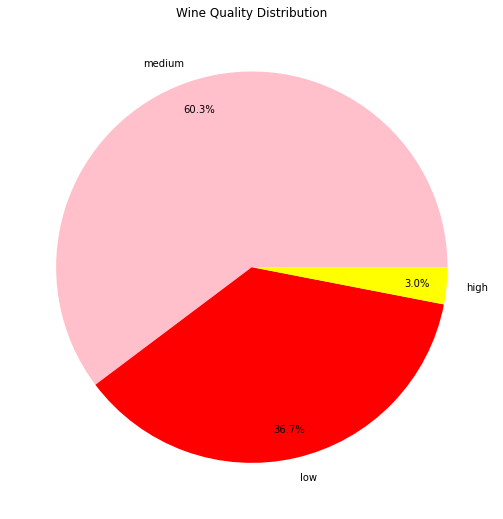

In [53]:
plt.figure(figsize=(9,9))
plt.pie(quality_counts, labels=quality_counts.index, autopct="%1.1f%%", colors=["pink", "red", "yellow"], pctdistance=0.85)
plt.title("Wine Quality Distribution")
plt.show()


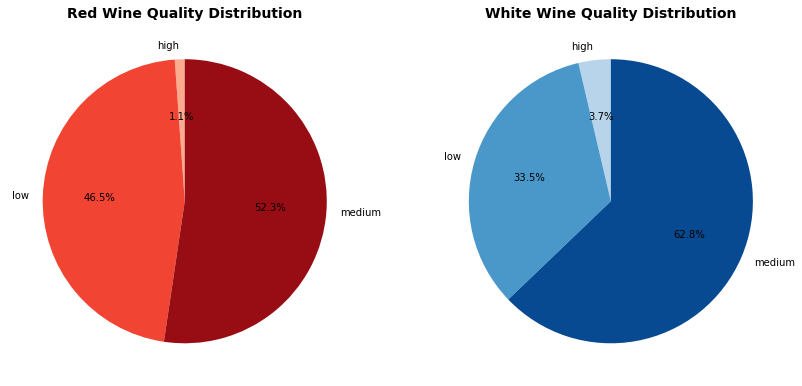

In [54]:
red_quality_counts = wine_df[wine_df["wine_type"] == "red"]["quality_label"].value_counts().sort_index()
white_quality_counts = wine_df[wine_df["wine_type"] == "white"]["quality_label"].value_counts().sort_index()

red_colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(red_quality_counts)))
white_colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(white_quality_counts)))

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(
    red_quality_counts, 
    labels=red_quality_counts.index, 
    autopct="%1.1f%%", 
    colors=red_colors, 
    startangle=90
)
ax[0].set_title("Red Wine Quality Distribution", fontsize=14, fontweight="bold")

ax[1].pie(
    white_quality_counts, 
    labels=white_quality_counts.index, 
    autopct="%1.1f%%", 
    colors=white_colors, 
    startangle=90
)
ax[1].set_title("White Wine Quality Distribution", fontsize=14, fontweight="bold")

plt.show()

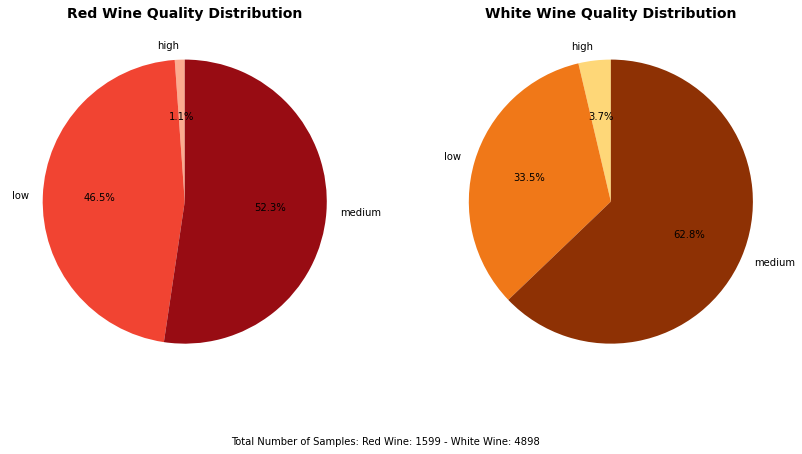

In [55]:
red_quality_counts = wine_df[wine_df["wine_type"] == "red"]["quality_label"].value_counts().sort_index()
white_quality_counts = wine_df[wine_df["wine_type"] == "white"]["quality_label"].value_counts().sort_index()

total_red = red_quality_counts.sum()
total_white = white_quality_counts.sum()

red_colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(red_quality_counts)))
gold_colors = plt.cm.YlOrBr(np.linspace(0.3, 0.9, len(white_quality_counts)))  # Mavi yerine altın tonları

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(
    red_quality_counts, 
    labels=red_quality_counts.index, 
    autopct="%1.1f%%", 
    colors=red_colors, 
    startangle=90
)
ax[0].set_title("Red Wine Quality Distribution", fontsize=14, fontweight="bold")

ax[1].pie(
    white_quality_counts, 
    labels=white_quality_counts.index, 
    autopct="%1.1f%%", 
    colors=gold_colors,  # Burada değiştirildi
    startangle=90
)
ax[1].set_title("White Wine Quality Distribution", fontsize=14, fontweight="bold")

plt.figtext(0.5, 0.02, f"Total Number of Samples: Red Wine: {total_red} - White Wine: {total_white}", 
            ha="center")
plt.show()


/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbookpro13retina/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


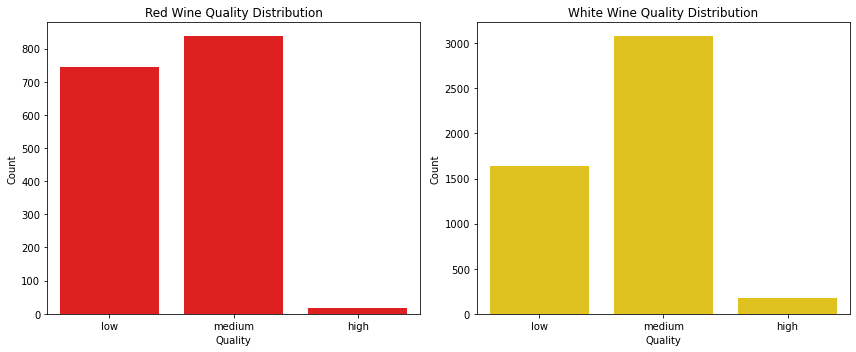

In [56]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(red_wine_df["quality_label"], color="red")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Red Wine Quality Distribution")

plt.subplot(1,2,2)
sns.countplot(white_wine_df["quality_label"], color="gold")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("White Wine Quality Distribution")

plt.tight_layout()
plt.show()

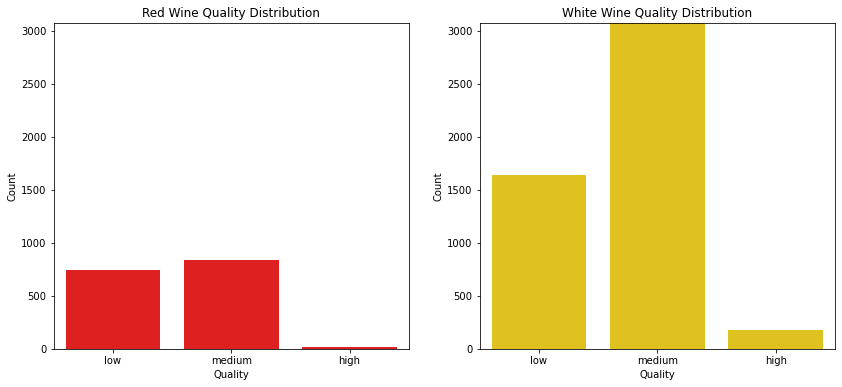

In [57]:
plt.figure(figsize=(14,6))

# X ekseninde ortak kalite sıralaması
quality_order = sorted(wine_df["quality_label"].unique())

# Kırmızı şarap grafiği
plt.subplot(1,2,1)
sns.countplot(x=red_wine_df["quality_label"], color="red")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Red Wine Quality Distribution")
plt.ylim(0, max(red_wine_df["quality_label"].value_counts().max(), white_wine_df["quality_label"].value_counts().max()))  # Y eksenini eşitle

# Beyaz şarap grafiği
plt.subplot(1,2,2)
sns.countplot(x=white_wine_df["quality_label"], color="gold")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("White Wine Quality Distribution")
plt.ylim(0, max(red_wine_df["quality_label"].value_counts().max(), white_wine_df["quality_label"].value_counts().max()))  # Aynı Y ekseni

# plt.tight_layout()
plt.show()

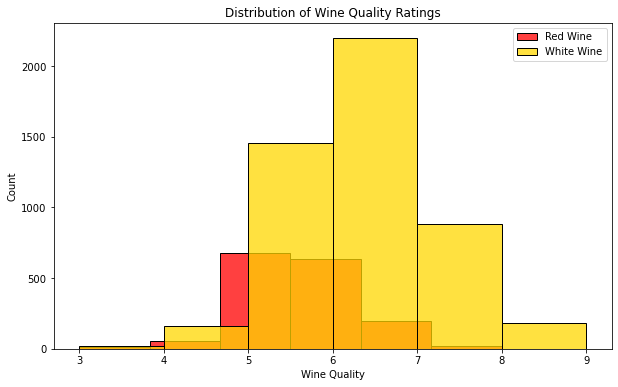

In [58]:
plt.figure(figsize=(10,6))

sns.histplot(red_wine_df["quality"], color="red", label="Red Wine", bins=6)
sns.histplot(white_wine_df["quality"], color="gold", label="White Wine", bins=6)

plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Ratings")
plt.legend()
plt.show()

In [59]:
# Tekrar eden satırları bul
duplicates = wine_df[wine_df.duplicated(keep=False)]

# Sonuçları yazdır
print(duplicates)


      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
9               7.5              0.50         0.36             6.1      0.071   
11              7.5              0.50         0.36             6.1      0.071   
22              7.9              0.43         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
6450            6.4              0.33         0.44             8.9      0.055   
6454            7.1              0.23         0.39            13.7      0.058   
6455            7.1              0.23         0.39            13.7      0.058   
6478            6.6              0.34         0.40             8.1      0.046   
6479            6.6              0.34         0.40             8.1      0.046   

      free_sulfur_dioxide  

In [60]:
# duplicate_counts = wine_df.groupby("wine_type").apply(lambda x: x.duplicated(keep=False).sum())

# print(duplicate_counts)

# red_duplicates = red_wine_df.duplicated(keep=False).sum()
# white_duplicates = white_wine_df.duplicated(keep=False).sum()

# print(f"Red wine duplicates: {red_duplicates}")
# # print(f"White wine duplicates: {white_duplicates}")

# # Tüm sütunları kullanarak tekrar eden satırları bulalım
# duplicate_counts = wine_df.duplicated(keep=False).sum()

# print(f"Toplam tekrar eden satır sayısı: {duplicate_counts}")

white_wine_df[white_wine_df.duplicated(keep="first")]


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.40             8.1      0.046   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4                    47.0                 186.0  0.99560  3.19       0.40   
5                    30.0                  97.0  0.99510  3.26       0.44   
7                    45.0                 170.0  1.00100  3.00       0.45   
8                    14.0                 132.0  0.99400  3.30       0.49   
20                   29.0                  75.0  0.98920  3.33       0.39   
...                   ...                   ...      ...   ...        ...   
4828                 54.0                 140.0  0.99670  3.23       0.47   
4850                 67.0                 161.0  0.99146  3.05       0.56   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality quality_label wine_type  
4      9.900000        6        medium     white  
5     10.100000        6        medium     white  
7      8.800000        6        medium     white  
8      9.500000        6        medium     white  
20    12.800000        8          high     white  
...         ...      ...           ...       ...  
4828   9.200000        5           low     white  
4850  11.100000        6        medium     white  
4851   9.600000        5           low     white  
4856   9.000000        6        medium     white  
4880   9.533333        6        medium     white  

[937 rows x 14 columns]

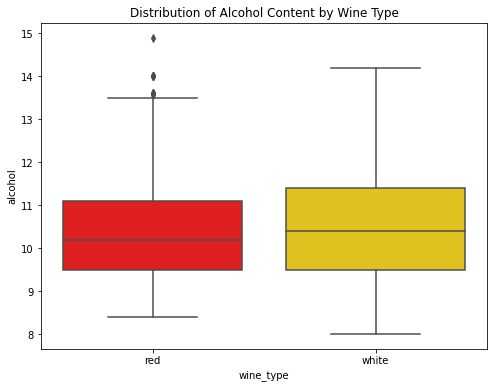

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="alcohol", palette=["red", "gold"], data=wine_df)
plt.title("Distribution of Alcohol Content by Wine Type")
plt.show()

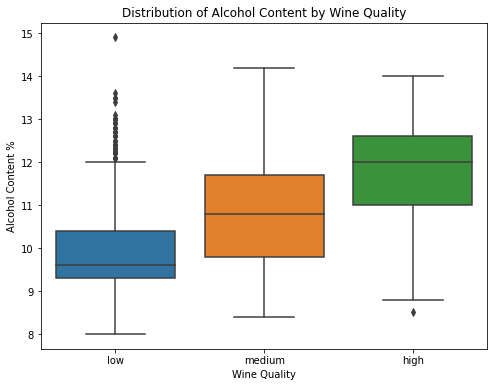

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(x="quality_label", y="alcohol", data=wine_df)
plt.title("Distribution of Alcohol Content by Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol Content %")
plt.show()

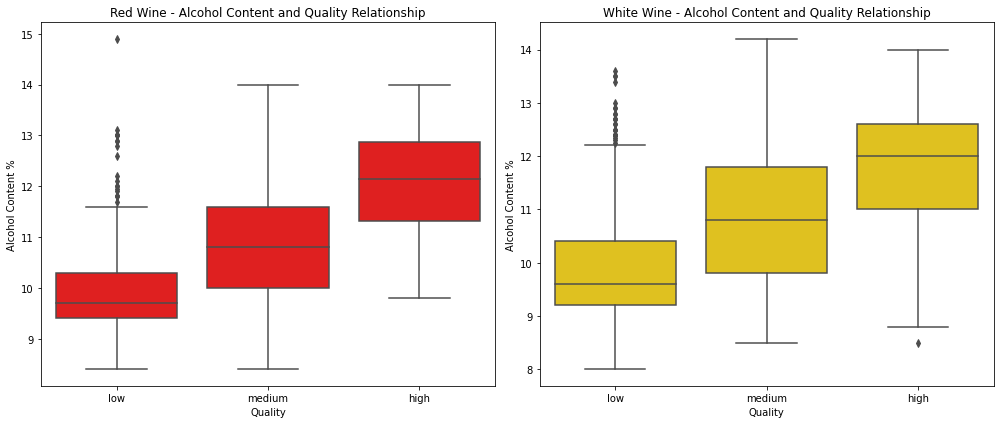

In [63]:
plt.figure(figsize=(14,6))

# Kırmızı şarap grafiği
plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="alcohol", data=red_wine_df, color="red")
plt.title("Red Wine - Alcohol Content and Quality Relationship")
plt.xlabel("Quality")
plt.ylabel("Alcohol Content %")

# Beyaz şarap grafiği
plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="alcohol", data=white_wine_df, color="gold")
plt.title("White Wine - Alcohol Content and Quality Relationship")
plt.xlabel("Quality")
plt.ylabel("Alcohol Content %")

plt.tight_layout()
plt.show()

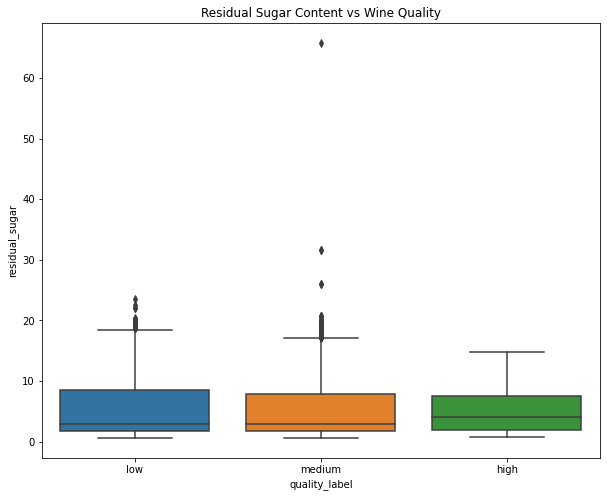

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(x="quality_label", y="residual_sugar", data=wine_df)
plt.title("Residual Sugar Content vs Wine Quality")
plt.show()

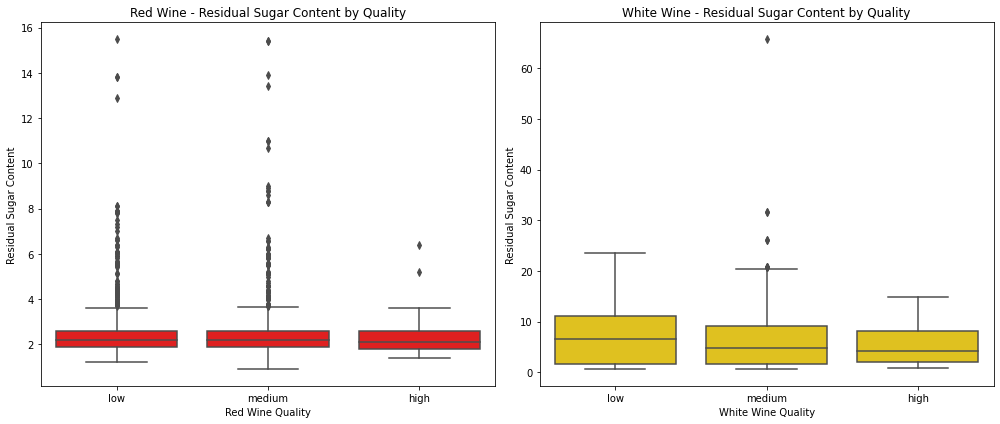

In [65]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="residual_sugar", data=red_wine_df, color="red")
plt.title("Red Wine - Residual Sugar Content by Quality")
plt.xlabel("Red Wine Quality")
plt.ylabel("Residual Sugar Content")

plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="residual_sugar", data=white_wine_df, color="gold")
plt.title("White Wine - Residual Sugar Content by Quality")
plt.xlabel("White Wine Quality")
plt.ylabel("Residual Sugar Content")

plt.tight_layout()
plt.show()

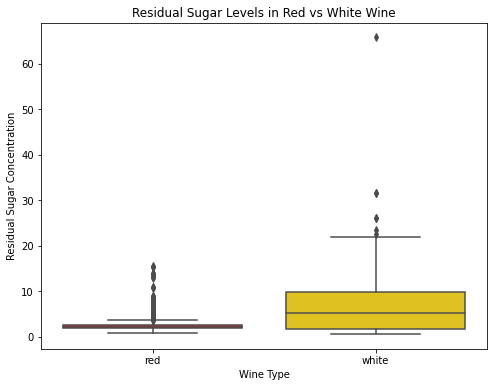

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="residual_sugar", data=wine_df, palette=["red", "gold"])
plt.title("Residual Sugar Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Residual Sugar Concentration")
plt.show()

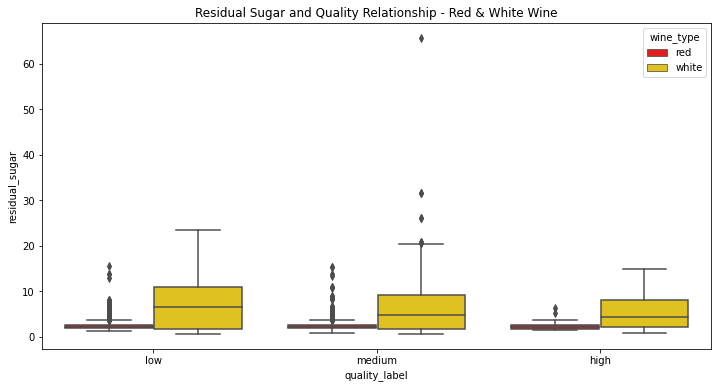

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="residual_sugar", hue="wine_type", data=wine_df, 
            palette={'red': "red", 'white': "gold"})
plt.title("Residual Sugar and Quality Relationship - Red & White Wine")
plt.show()

In [68]:
# Beyaz şarapları filtreleyelim
white_wines = wine_df[wine_df['wine_type'] == 'white']

# En yüksek residual sugar değerine sahip beyaz şarabı bulalım
outlier_row = white_wines.loc[white_wines['residual_sugar'].idxmax()]

# Outlier beyaz şarabın tüm değerlerini yazdıralım
print(outlier_row)

fixed_acidity               7.8
volatile_acidity          0.965
citric_acid                 0.6
residual_sugar             65.8
chlorides                 0.074
free_sulfur_dioxide         8.0
total_sulfur_dioxide      160.0
density                 1.03898
pH                         3.39
sulphates                  0.69
alcohol                    11.7
quality                       6
quality_label            medium
wine_type                 white
Name: 4380, dtype: object


In [69]:
# Beyaz şarapları filtreleyelim
red_wines = wine_df[wine_df['wine_type'] == 'red']

# En yüksek residual sugar değerine sahip beyaz şarabı bulalım
outlier_row = red_wines.loc[red_wines['residual_sugar'].idxmax()]

# Outlier beyaz şarabın tüm değerlerini yazdıralım
print(outlier_row)


fixed_acidity             10.6
volatile_acidity          0.28
citric_acid               0.39
residual_sugar            15.5
chlorides                0.069
free_sulfur_dioxide        6.0
total_sulfur_dioxide      23.0
density                 1.0026
pH                        3.12
sulphates                 0.66
alcohol                    9.2
quality                      5
quality_label              low
wine_type                  red
Name: 480, dtype: object


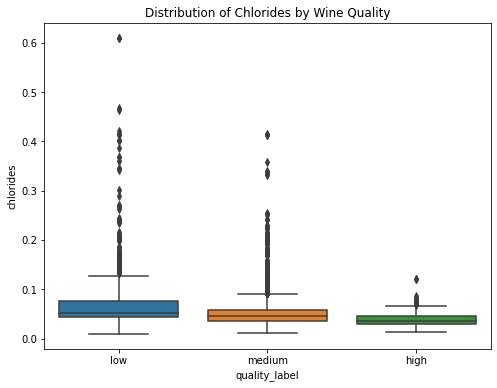

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(x="quality_label", y="chlorides", data=wine_df)
plt.title("Distribution of Chlorides by Wine Quality")
plt.show()

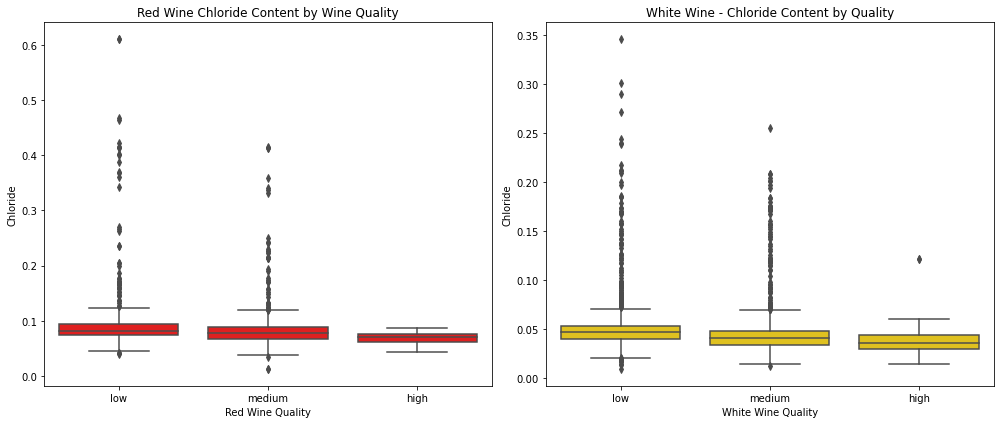

In [71]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="chlorides", data=red_wine_df, color="red")
plt.title("Red Wine Chloride Content by Wine Quality")
plt.xlabel("Red Wine Quality")
plt.ylabel("Chloride")

plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="chlorides", data=white_wine_df, color="gold")
plt.title("White Wine - Chloride Content by Quality")
plt.xlabel("White Wine Quality")
plt.ylabel("Chloride")

plt.tight_layout()
plt.show()

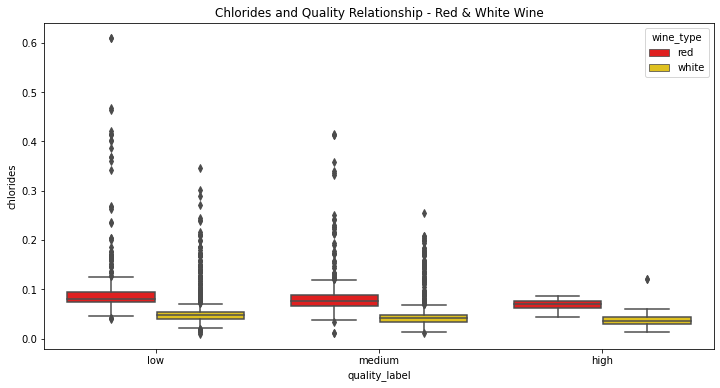

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="chlorides", hue="wine_type", data=wine_df, 
            palette={'red': "red", 'white': "gold"})
plt.title("Chlorides and Quality Relationship - Red & White Wine")
plt.show()

Here I examined the relationship between chloride levels and wine quality using a boxplot that distinguishes between red and white wines. The visualization clearly shows that the chloride content varies significantly across different qualities. Notably, wines with lower quality ratings tend to show higher variability in chloride levels, whereas higher-quality wines appear to have more controlled and consistent chloride concentrations. It should also be noted that white wine tends to contain much less chloride compared to red wine.

This pattern suggests that the management of chloride content during production might be a critical factor in achieving better wine quality. Variations in chloride levels could be indicative of differences in wine-making practices, such as water quality, or grape handling. While the boxplot provides compelling evidence of a correlation, it is important to note that this does not necessarily imply causation. Further multivariate analysis, such as regression modeling, would be required to isolate the impact of chlorides from other influential factors.

In summary, the findings raise an important question: can tighter control over chloride levels lead to better quality wines? This insight opens the door for deeper investigation into the production processes and quality control measures.

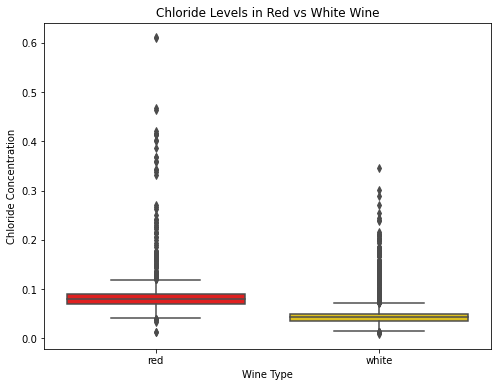

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="chlorides", data=wine_df, palette=["red", "gold"])
plt.title("Chloride Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Chloride Concentration")
plt.show()

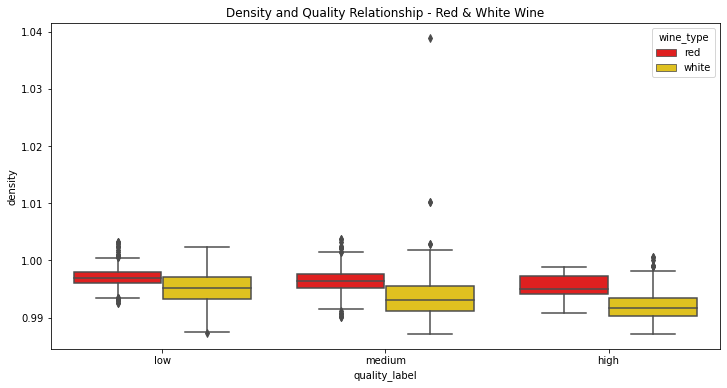

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="density", hue="wine_type", data=wine_df, 
            palette={'red': "red", 'white': "gold"})
plt.title("Density and Quality Relationship - Red & White Wine")
plt.show()

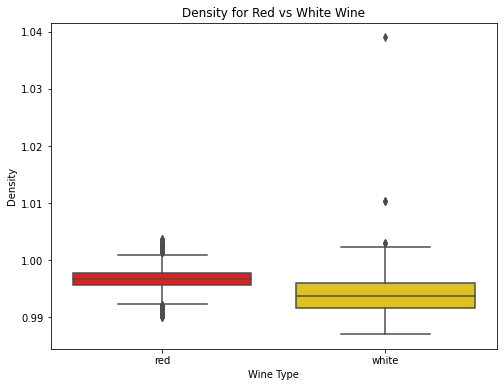

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="density", data=wine_df, palette=["red", "gold"])
plt.title("Density for Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Density")
plt.show()

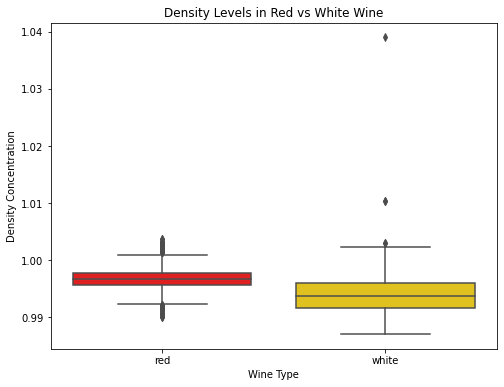

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="density", data=wine_df, palette=["red", "gold"])
plt.title("Density Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Density Concentration")
plt.show()

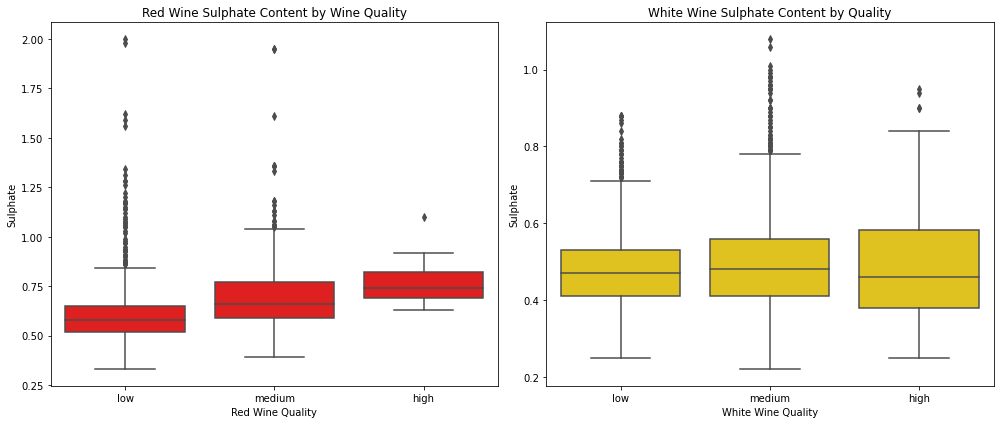

In [77]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="sulphates", data=red_wine_df, color="red")
plt.title("Red Wine Sulphate Content by Wine Quality")
plt.xlabel("Red Wine Quality")
plt.ylabel("Sulphate")

plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="sulphates", data=white_wine_df, color="gold")
plt.title("White Wine Sulphate Content by Quality")
plt.xlabel("White Wine Quality")
plt.ylabel("Sulphate")

plt.tight_layout()
plt.show()

Kırmızı şarapta doğal olarak daha fazla antioksidan olduğu için sülfata daha az ihtiyaç duyulur.
Beyaz şarap daha hassas olduğu için oksidasyonu önlemek adına sülfat oranı genellikle daha yüksek olur.

Eğer sülfat oranı arttıkça kalite artıyor gibi görünüyorsa, nedensellik mi yoksa korelasyon mu? sorusunu sormalıyız. Yani:

Yüksek kaliteli şaraplar başka nedenlerle mi sülfat içeriyor?
Yoksa sülfat doğrudan kaliteyi artıran bir faktör mü?
Bunu doğrulamak için sülfat dışında başka faktörleri de aynı anda incelemek gerekebilir.

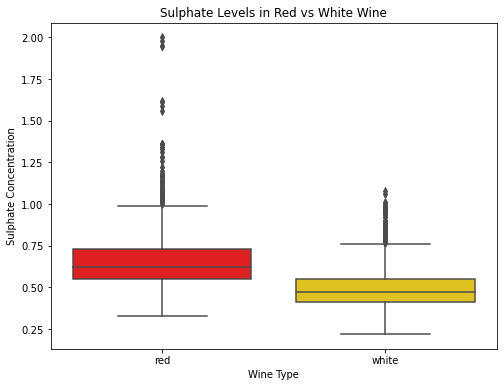

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="sulphates", data=wine_df, palette=["red", "gold"])
plt.title("Sulphate Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Sulphate Concentration")
plt.show()

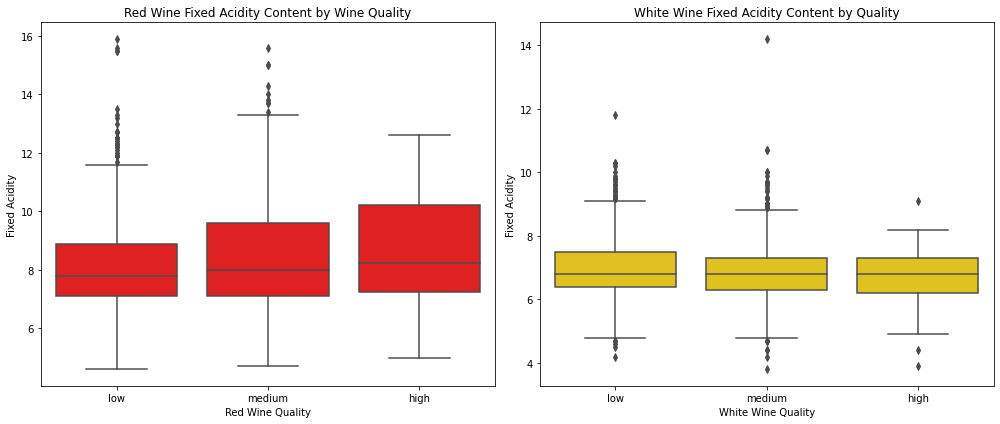

In [79]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="fixed_acidity", data=red_wine_df, color="red")
plt.title("Red Wine Fixed Acidity Content by Wine Quality")
plt.xlabel("Red Wine Quality")
plt.ylabel("Fixed Acidity")

plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="fixed_acidity", data=white_wine_df, color="gold")
plt.title("White Wine Fixed Acidity Content by Quality")
plt.xlabel("White Wine Quality")
plt.ylabel("Fixed Acidity")

plt.tight_layout()
plt.show()

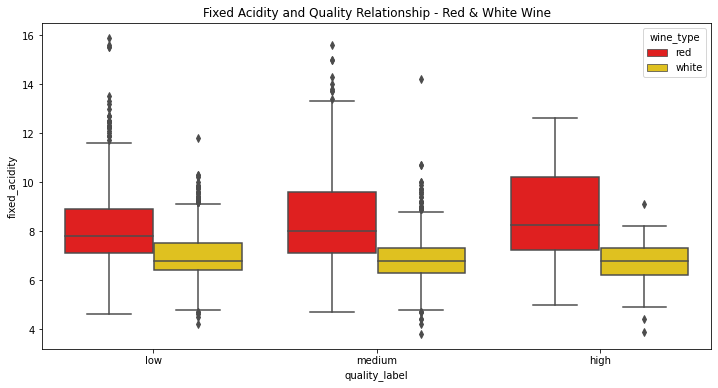

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="fixed_acidity", hue="wine_type", data=wine_df, 
            palette={'red': "red", 'white': "gold"})
plt.title("Fixed Acidity and Quality Relationship - Red & White Wine")
plt.show()

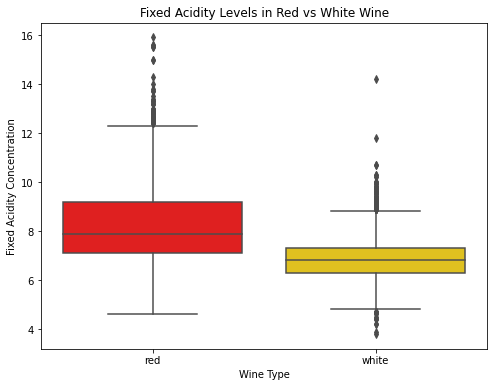

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="fixed_acidity", data=wine_df, palette=["red", "gold"])
plt.title("Fixed Acidity Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Fixed Acidity Concentration")
plt.show()

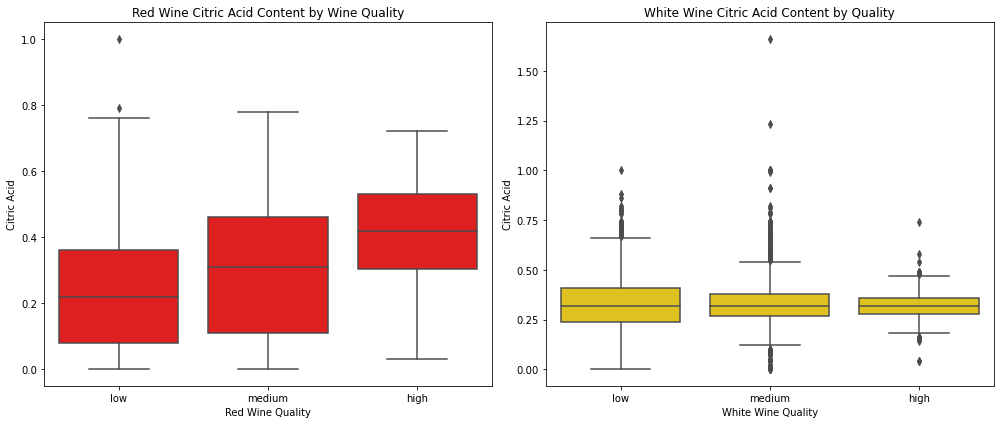

In [82]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="citric_acid", data=red_wine_df, color="red")
plt.title("Red Wine Citric Acid Content by Wine Quality")
plt.xlabel("Red Wine Quality")
plt.ylabel("Citric Acid")

plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="citric_acid", data=white_wine_df, color="gold")
plt.title("White Wine Citric Acid Content by Quality")
plt.xlabel("White Wine Quality")
plt.ylabel("Citric Acid")

plt.tight_layout()
plt.show()

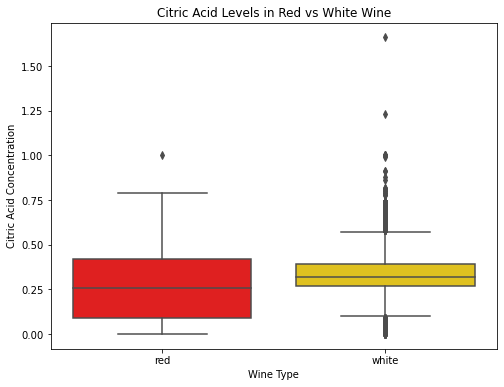

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="citric_acid", data=wine_df, palette=["red", "gold"])
plt.title("Citric Acid Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Citric Acid Concentration")
plt.show()

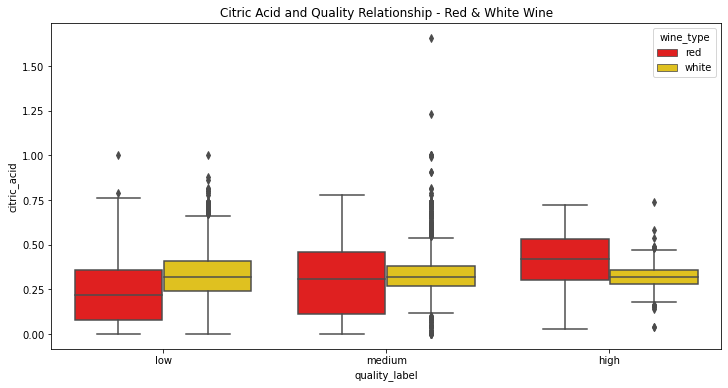

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="citric_acid", hue="wine_type", data=wine_df, palette={'red': "red", 'white': "gold"})
plt.title("Citric Acid and Quality Relationship - Red & White Wine")
plt.show()

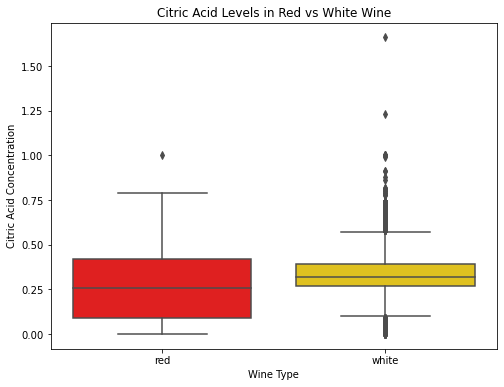

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="citric_acid", data=wine_df, palette=["red", "gold"])
plt.title("Citric Acid Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Citric Acid Concentration")
plt.show()

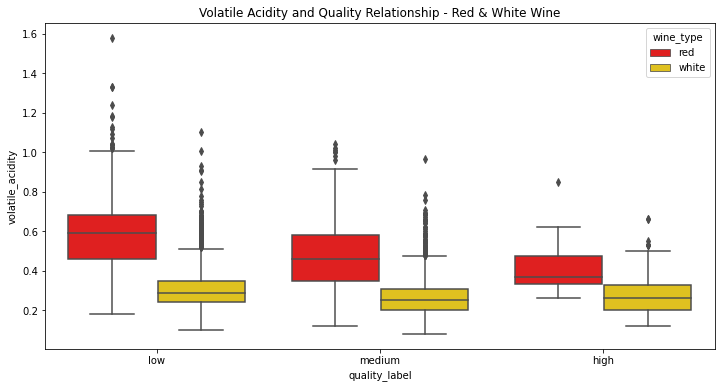

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="volatile_acidity", hue="wine_type", data=wine_df, palette={'red': "red", 'white': "gold"})
plt.title("Volatile Acidity and Quality Relationship - Red & White Wine")
plt.show()

The volatile acidity levels in the wines in our dataset are well below the US limits of 1.2 g/L for red wines and 1.1 g/L for white wines. Our red and white vinho verde samples from northern Portugal appear to be doing just fine in terms of volatile acidity.

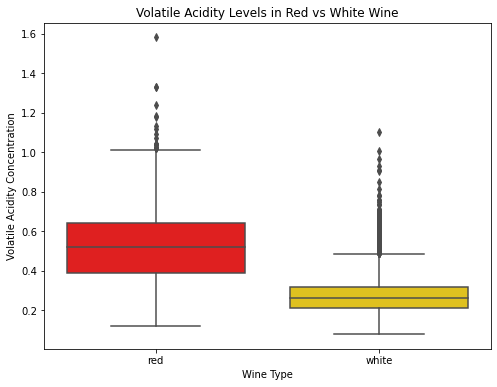

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(x="wine_type", y="volatile_acidity", data=wine_df, palette=["red", "gold"])
plt.title("Volatile Acidity Levels in Red vs White Wine")
plt.xlabel("Wine Type")
plt.ylabel("Volatile Acidity Concentration")
plt.show()

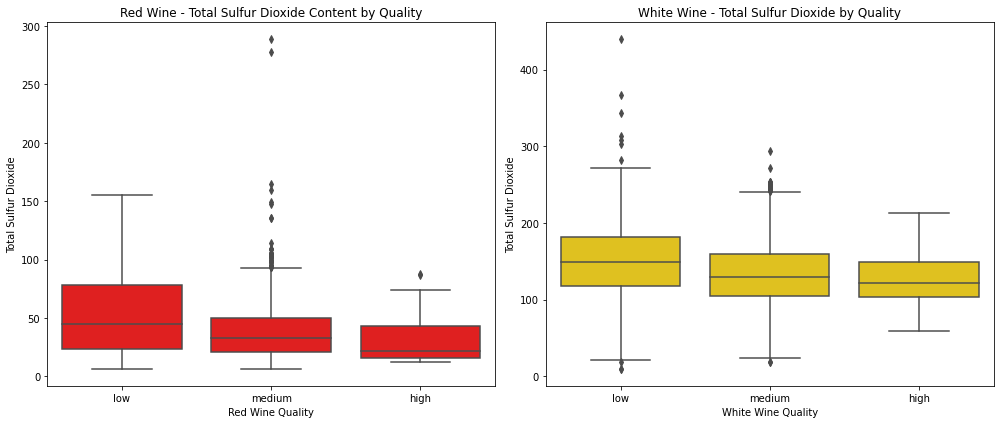

In [88]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="total_sulfur_dioxide", data=red_wine_df, color="red")
plt.title("Red Wine - Total Sulfur Dioxide Content by Quality")
plt.xlabel("Red Wine Quality")
plt.ylabel("Total Sulfur Dioxide")

plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="total_sulfur_dioxide", data=white_wine_df, color="gold")
plt.title("White Wine - Total Sulfur Dioxide by Quality")
plt.xlabel("White Wine Quality")
plt.ylabel("Total Sulfur Dioxide")

plt.tight_layout()
plt.show()

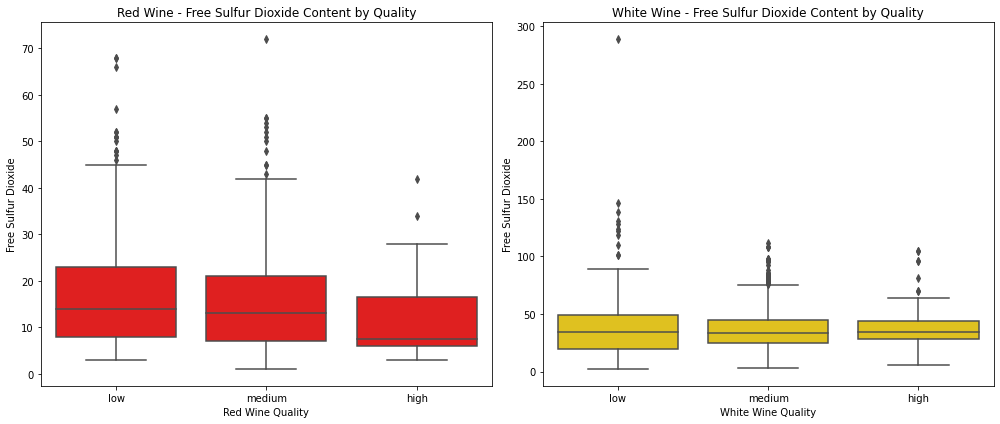

In [89]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x="quality_label", y="free_sulfur_dioxide", data=red_wine_df, color="red")
plt.title("Red Wine - Free Sulfur Dioxide Content by Quality")
plt.xlabel("Red Wine Quality")
plt.ylabel("Free Sulfur Dioxide")

plt.subplot(1,2,2)
sns.boxplot(x="quality_label", y="free_sulfur_dioxide", data=white_wine_df, color="gold")
plt.title("White Wine - Free Sulfur Dioxide Content by Quality")
plt.xlabel("White Wine Quality")
plt.ylabel("Free Sulfur Dioxide")

plt.tight_layout()
plt.show()

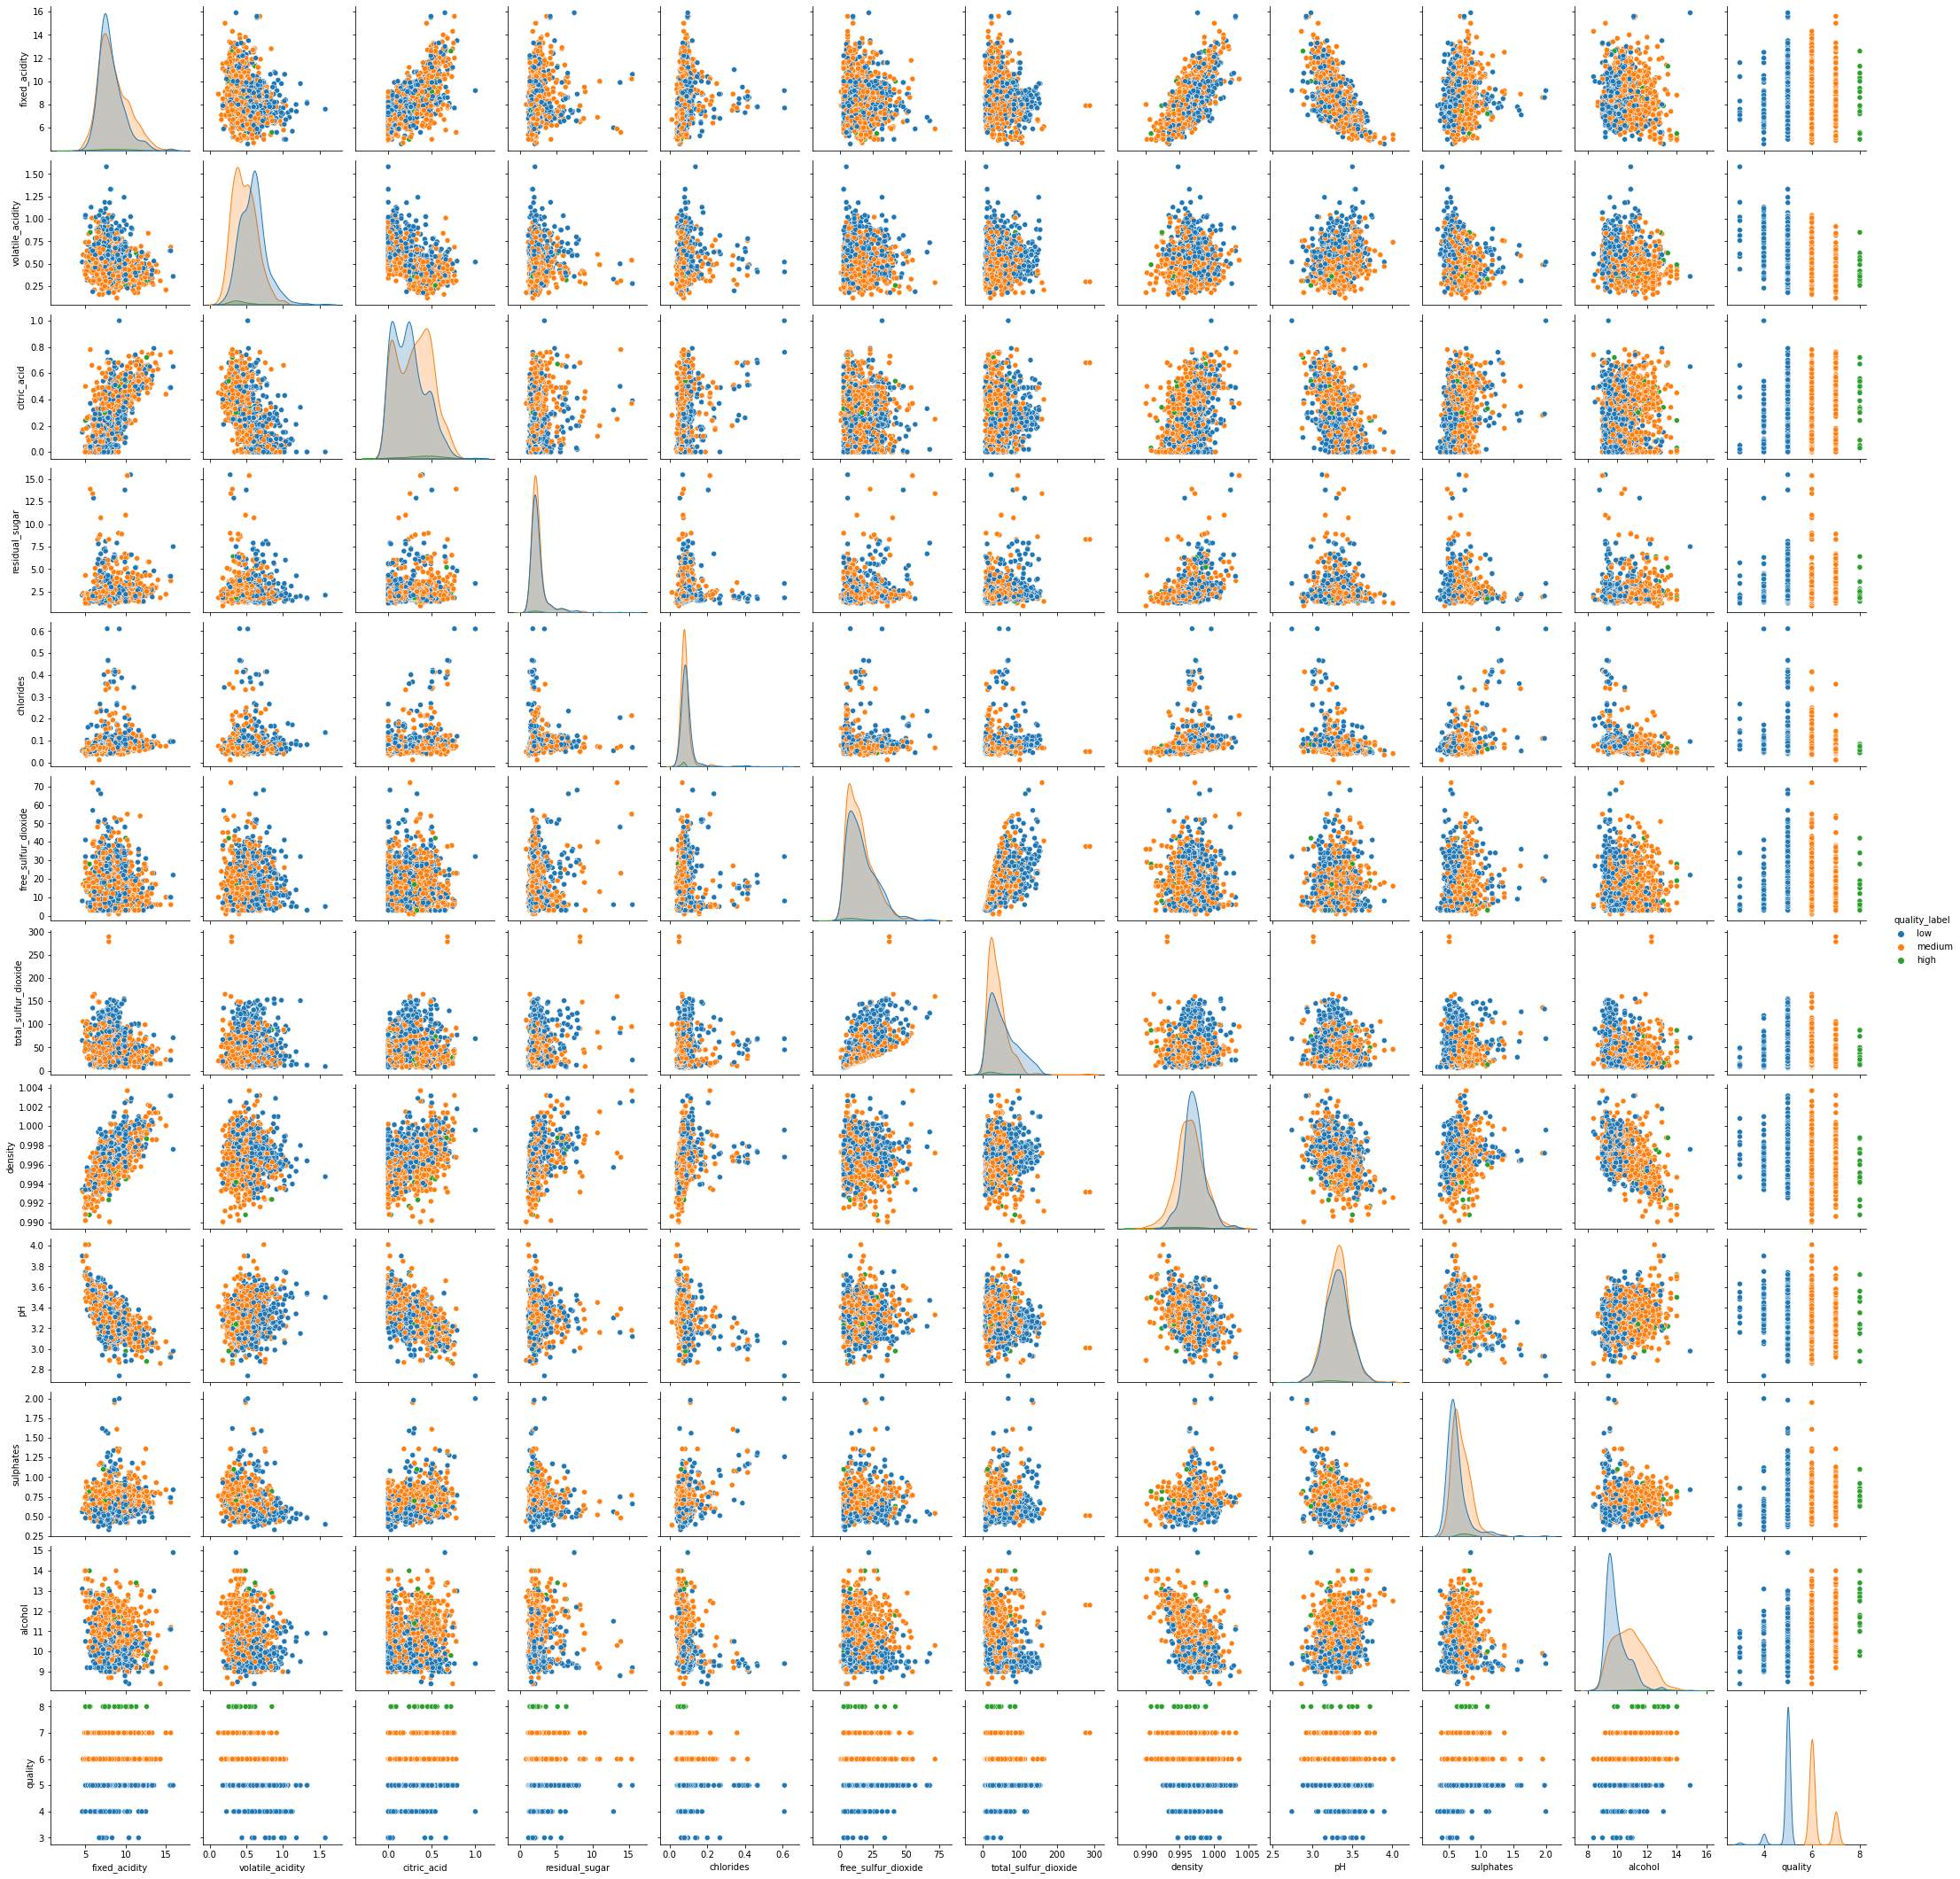

In [90]:
sns.pairplot(red_wine_df, hue= 'quality_label')

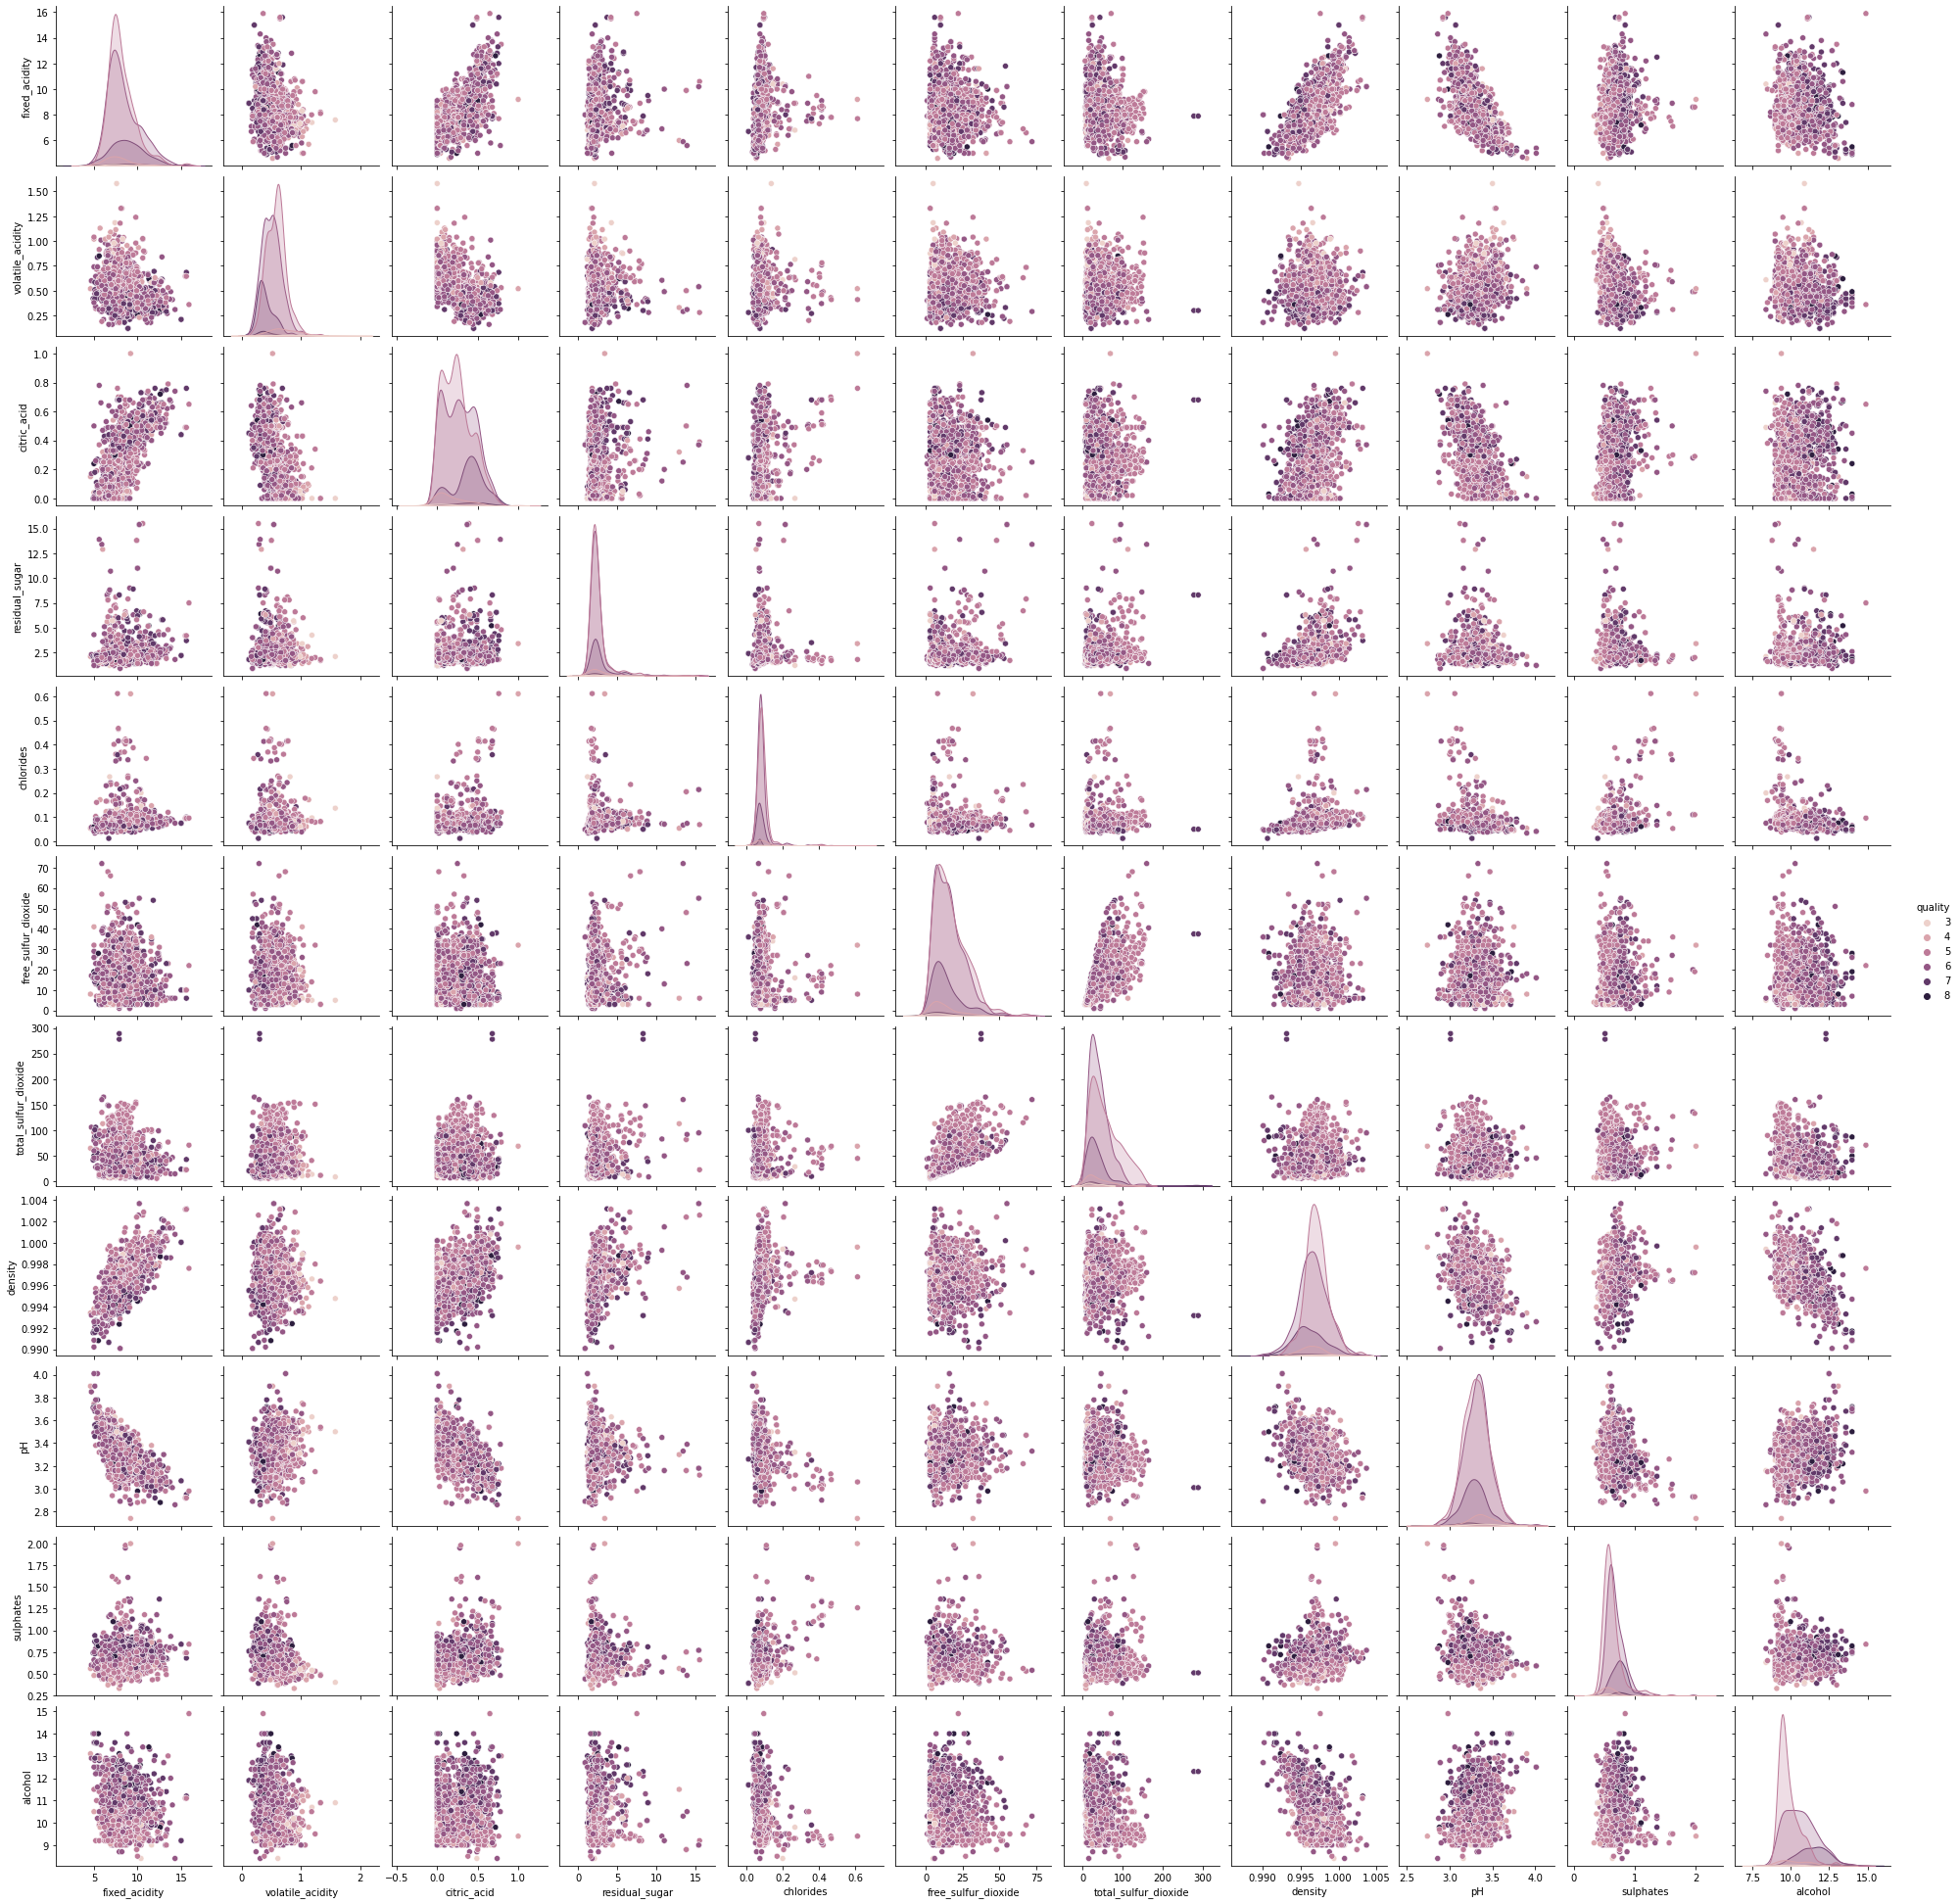

In [91]:
sns.pairplot(red_wine_df, hue= 'quality')

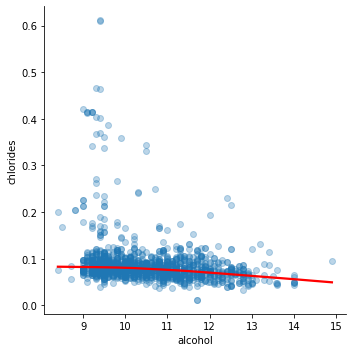

In [92]:
sns.lmplot(data=red_wine_df, x="alcohol", y="chlorides", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"}, lowess=True)
plt.show()

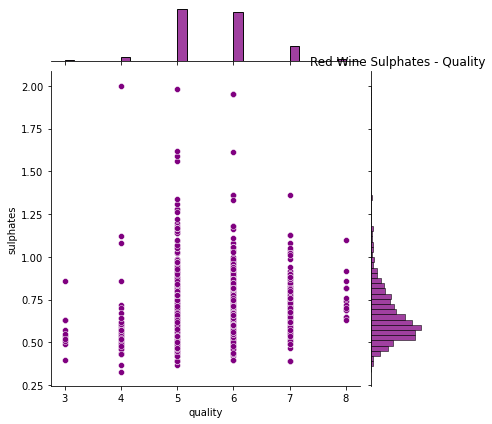

In [93]:
sns.jointplot(data=red_wine_df, x="quality", y="sulphates", kind="scatter", color="purple")
plt.title("Red Wine Sulphates - Quality")
plt.show()

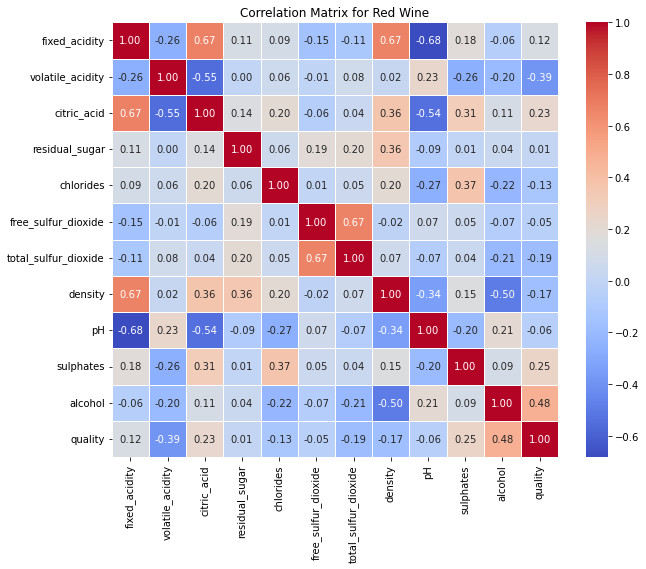

In [94]:
corr_matrix_red = red_wine_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_red, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Red Wine")
plt.show()

In [95]:
# Correlation with quality
quality_corr_red = corr_matrix_red['quality'].sort_values(ascending=False)
print(quality_corr_red)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


gökçipom 

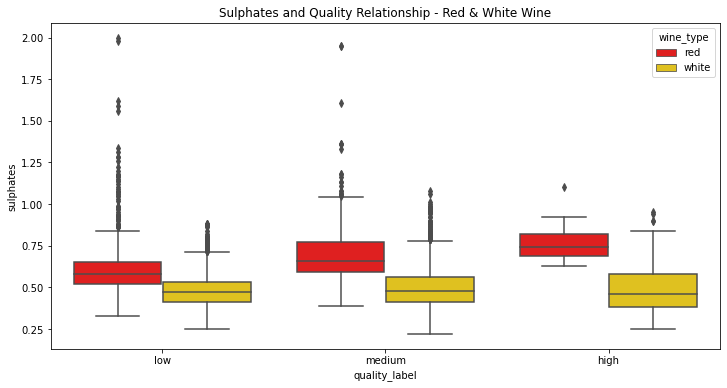

In [96]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="sulphates", hue="wine_type", data=wine_df, palette={'red': "red", 'white': "gold"})
plt.title("Sulphates and Quality Relationship - Red & White Wine")
plt.show()

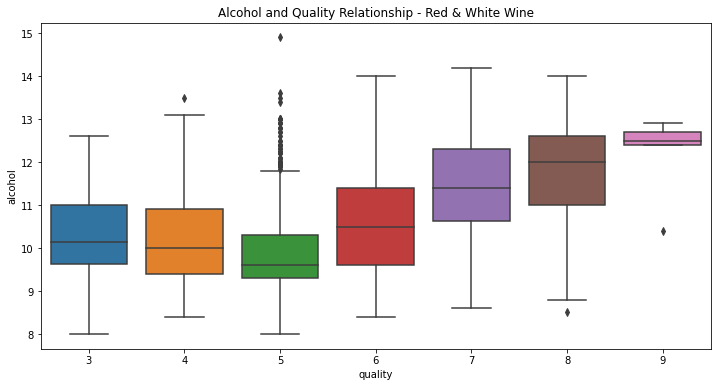

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality", y="alcohol", data=wine_df)
plt.title("Alcohol and Quality Relationship - Red & White Wine")
plt.show()

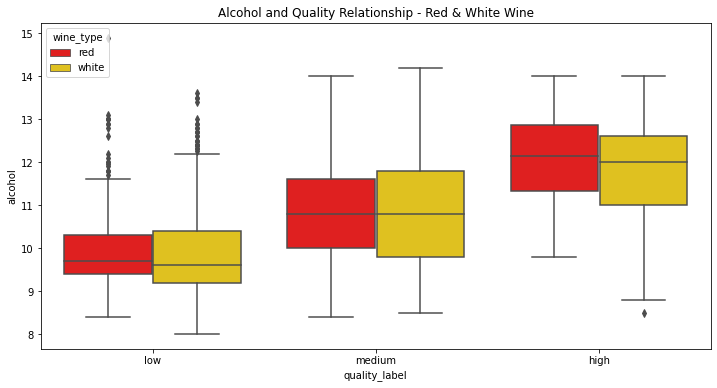

In [98]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="quality_label", y="alcohol", hue="wine_type", data=wine_df, 
            palette={'red': "red", 'white': "gold"})
plt.title("Alcohol and Quality Relationship - Red & White Wine")
plt.show()

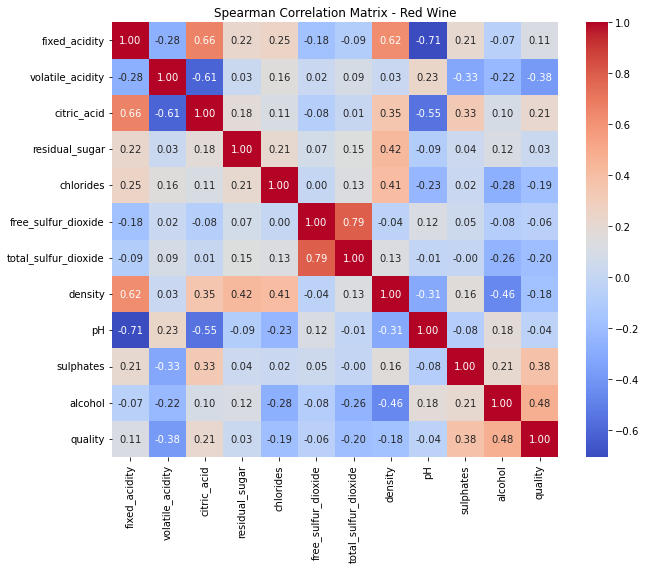

In [99]:
import scipy.stats as stats

spearman_corr = red_wine_df.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix - Red Wine")
plt.show()


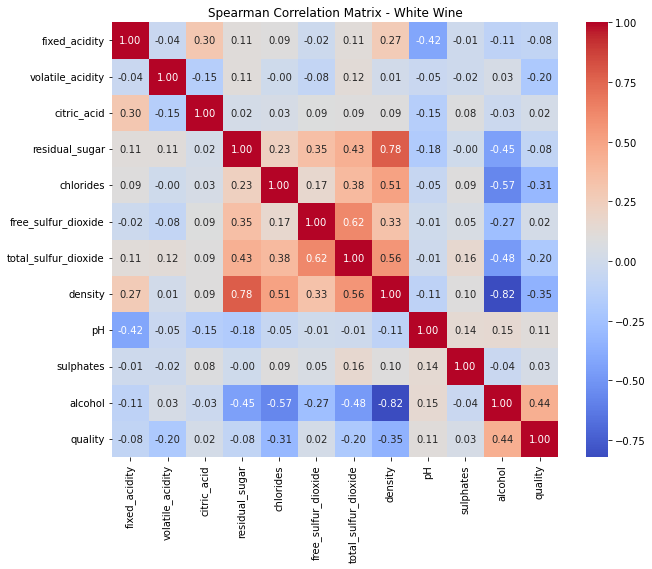

In [100]:
import scipy.stats as stats

spearman_corr = white_wine_df.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix - White Wine")
plt.show()


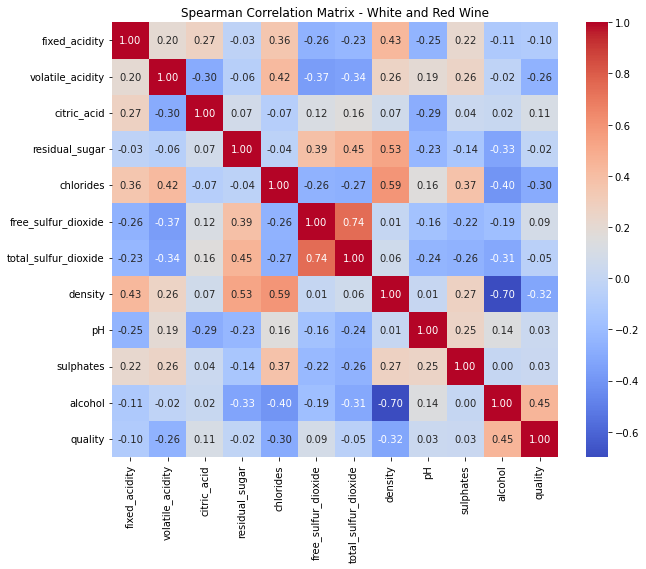

In [101]:
spearman_corr = wine_df.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix - White and Red Wine")
plt.show()


In [102]:
import scipy.stats as stats

anova_alcohol = stats.f_oneway(
    wine_df[wine_df['quality_label'] == 'low']['alcohol'],
    wine_df[wine_df['quality_label'] == 'medium']['alcohol'],
    wine_df[wine_df['quality_label'] == 'high']['alcohol']
)

print("ANOVA Test - Alcohol Content and Wine Quality:", anova_alcohol)


ANOVA Test - Alcohol Content and Wine Quality: F_onewayResult(statistic=673.0745347231032, pvalue=2.2715337450621843e-266)


In [103]:
anova_citric_acid = stats.f_oneway(
    wine_df[wine_df['quality_label'] == 'low']['citric_acid'],
    wine_df[wine_df['quality_label'] == 'medium']['citric_acid'],
    wine_df[wine_df['quality_label'] == 'high']['citric_acid']
)

print("ANOVA Test - Citric Acid Content and Wine Quality:", anova_citric_acid)


ANOVA Test - Citric Acid Content and Wine Quality: F_onewayResult(statistic=18.968901422737094, pvalue=6.1077442166569355e-09)


In [104]:
anova_density = stats.f_oneway(
    wine_df[wine_df['quality_label'] == 'low']['density'],
    wine_df[wine_df['quality_label'] == 'medium']['density'],
    wine_df[wine_df['quality_label'] == 'high']['density']
)

print("ANOVA Test - Density and Wine Quality:", anova_density)


ANOVA Test - Density and Wine Quality: F_onewayResult(statistic=287.5901261740119, pvalue=2.1186713255495357e-120)


In [105]:
anova_residual_sugar = stats.f_oneway(
    wine_df[wine_df['quality_label'] == 'low']['residual_sugar'],
    wine_df[wine_df['quality_label'] == 'medium']['residual_sugar'],
    wine_df[wine_df['quality_label'] == 'high']['residual_sugar']
)

print("ANOVA Test - Residual Sugar Content and Wine Quality:", anova_residual_sugar)


ANOVA Test - Residual Sugar Content and Wine Quality: F_onewayResult(statistic=3.432938987382213, pvalue=0.032350509691691995)


In [106]:
anova_volatile_acidity = stats.f_oneway(
    wine_df[wine_df['quality_label'] == 'low']['residual_sugar'],
    wine_df[wine_df['quality_label'] == 'medium']['residual_sugar'],
    wine_df[wine_df['quality_label'] == 'high']['residual_sugar']
)

print("ANOVA Test - Volatile Acidity and Wine Quality:", anova_volatile_acidity)


ANOVA Test - Volatile Acidity and Wine Quality: F_onewayResult(statistic=3.432938987382213, pvalue=0.032350509691691995)


In [107]:
anova_sulphates = stats.f_oneway(
    red_wine_df[red_wine_df['quality_label'] == 'low']['sulphates'],
    red_wine_df[red_wine_df['quality_label'] == 'medium']['sulphates'],
    red_wine_df[red_wine_df['quality_label'] == 'high']['sulphates']
)

print("ANOVA Test - Sulphates Content and Wine Quality (Red Wine Only):", anova_sulphates)


ANOVA Test - Sulphates Content and Wine Quality (Red Wine Only): F_onewayResult(statistic=41.83852380407374, pvalue=1.9501375044481924e-18)


In [108]:
anova_sulphates = stats.f_oneway(
    wine_df[wine_df['quality_label'] == 'low']['sulphates'],
    wine_df[wine_df['quality_label'] == 'medium']['sulphates'],
    wine_df[wine_df['quality_label'] == 'high']['sulphates']
)

print("ANOVA Test - Sulphates Content and Wine Quality:", anova_sulphates)


ANOVA Test - Sulphates Content and Wine Quality: F_onewayResult(statistic=6.884948526194737, pvalue=0.0010305533421903841)


In [109]:
anova_sulphates = stats.f_oneway(
    white_wine_df[white_wine_df['quality_label'] == 'low']['sulphates'],
    white_wine_df[white_wine_df['quality_label'] == 'medium']['sulphates'],
    white_wine_df[white_wine_df['quality_label'] == 'high']['sulphates']
)

print("ANOVA Test - Sulphates Content and Wine Quality (White Wine Only):", anova_sulphates)


ANOVA Test - Sulphates Content and Wine Quality (White Wine Only): F_onewayResult(statistic=7.115761884652371, pvalue=0.0008206303019817734)


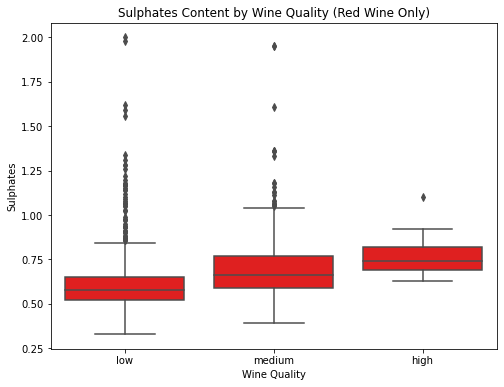

In [110]:
plt.figure(figsize=(8,6))
sns.boxplot(x="quality_label", y="sulphates", data=red_wine_df, color="red")
plt.title("Sulphates Content by Wine Quality (Red Wine Only)")
plt.xlabel("Wine Quality")
plt.ylabel("Sulphates")
plt.show()

In [111]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
 13  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


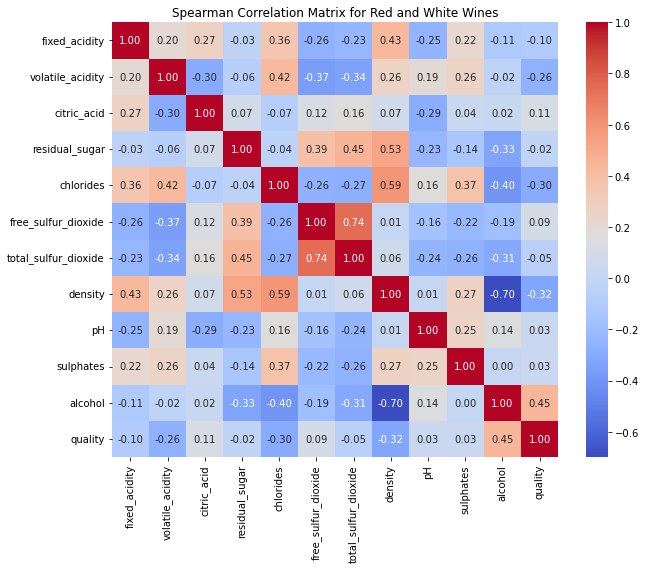

In [112]:
spearman_corr = wine_df.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix for Red and White Wines")
plt.show()

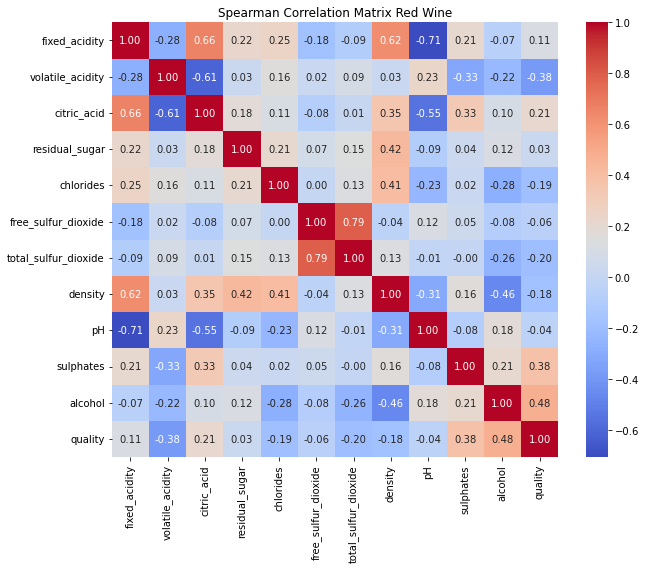

In [113]:
spearman_corr = red_wine_df.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix Red Wine")
plt.show()

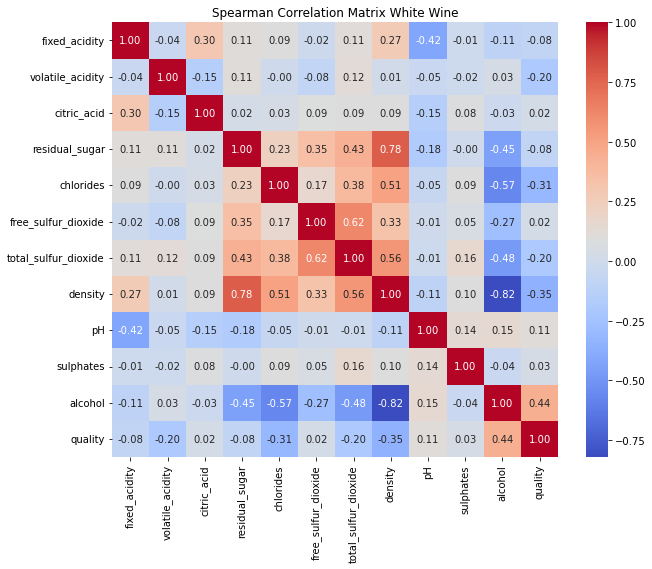

In [114]:
spearman_corr = white_wine_df.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix White Wine")
plt.show()

In [115]:
# jupyter nbconvert --to script wine.ipynb

In [116]:
red_wine_df.to_csv("red_wine_ml.csv", index=False)
white_wine_df.to_csv("white_wine_ml.csv", index=False)
wine_df.to_csv("wine_ml.csv", index=False)

In [117]:
print(f"Duplicate Rows: {wine_df.duplicated().sum()}")

Duplicate Rows: 1177


In [119]:
print(wine_df["quality_label"].value_counts())

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64


In [120]:
wine_df["quality_label"].value_counts(normalize=True)

medium    0.602586
low       0.366939
high      0.030476
Name: quality_label, dtype: float64